In [ ]:
dfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/ASAC3기_이상탐지/Data/Machine_Signal_30_train.csv"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from PIL import Image

# 1.데이터 불러오기

In [ ]:
df = pd.read_csv(path)

# 2.데이터 탐색

In [ ]:
df.head()

,ckey,machine_id,date,hour,connect_avg,connect_max,in_handover_rate,out_handover_rate,inter_handover_rate,lower_prb,upper_prb,reconfig_rate
0,MA1004_0-20210901-0,MA1004_0,20210901,0,27.913285,43.0,97.523220,100.000000,100.0,45.402603,59.021408,100.409763
1,MA1004_0-20210901-1,MA1004_0,20210901,1,23.013333,36.0,98.170732,NaN,100.0,36.740540,21.128778,99.953052
2,MA1004_0-20210901-2,MA1004_0,20210901,2,22.158977,38.0,98.039216,98.765432,100.0,28.568421,15.338933,100.249377
3,MA1004_0-20210901-3,MA1004_0,20210901,3,18.396667,34.0,98.717949,100.000000,100.0,16.503713,8.009815,100.512821
4,MA1004_0-20210901-4,MA1004_0,20210901,4,14.173889,28.0,97.014925,100.000000,100.0,14.133542,5.109716,99.923136


In [ ]:
df.tail()

,ckey,machine_id,date,hour,connect_avg,connect_max,in_handover_rate,out_handover_rate,inter_handover_rate,lower_prb,upper_prb,reconfig_rate
42451,MA1132_12-20211031-19,MA1132_12,20211031,19,11.391667,45.0,99.447514,100.000000,99.700599,14.068990,3.048933,98.417814
42452,MA1132_12-20211031-20,MA1132_12,20211031,20,14.432222,49.0,99.335548,100.000000,100.000000,24.932063,7.967112,98.932284
42453,MA1132_12-20211031-21,MA1132_12,20211031,21,13.742778,52.0,98.579041,99.818841,100.000000,19.279502,4.558336,98.698670
42454,MA1132_12-20211031-22,MA1132_12,20211031,22,15.106111,84.0,99.502488,100.000000,100.000000,24.277397,6.264523,98.130369
42455,MA1132_12-20211031-23,MA1132_12,20211031,23,10.626111,30.0,99.022801,99.703264,100.000000,19.859175,3.772831,98.328149


In [ ]:
print("데이터 크기:", df.shape)

데이터 크기: (42456, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42456 entries, 0 to 42455
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ckey                 42456 non-null  object 
 1   machine_id           42456 non-null  object 
 2   date                 42456 non-null  int64  
 3   hour                 42456 non-null  int64  
 4   connect_avg          41500 non-null  float64
 5   connect_max          41500 non-null  float64
 6   in_handover_rate     37743 non-null  float64
 7   out_handover_rate    37925 non-null  float64
 8   inter_handover_rate  34711 non-null  float64
 9   lower_prb            41172 non-null  float64
 10  upper_prb            41172 non-null  float64
 11  reconfig_rate        39075 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.9+ MB


In [ ]:
df.dtypes

ckey                    object
machine_id              object
date                     int64
hour                     int64
connect_avg            float64
connect_max            float64
in_handover_rate       float64
out_handover_rate      float64
inter_handover_rate    float64
lower_prb              float64
upper_prb              float64
reconfig_rate          float64
dtype: object

In [ ]:
null_df = (df.isnull().sum() / df.shape[0] * 100).to_frame('null_ratio').sort_values('null_ratio', ascending = True)

In [ ]:
null_df

,null_ratio
ckey,0.000000
machine_id,0.000000
date,0.000000
hour,0.000000
connect_avg,2.251743
connect_max,2.251743
lower_prb,3.024308
upper_prb,3.024308
reconfig_rate,7.963539
out_handover_rate,10.672225


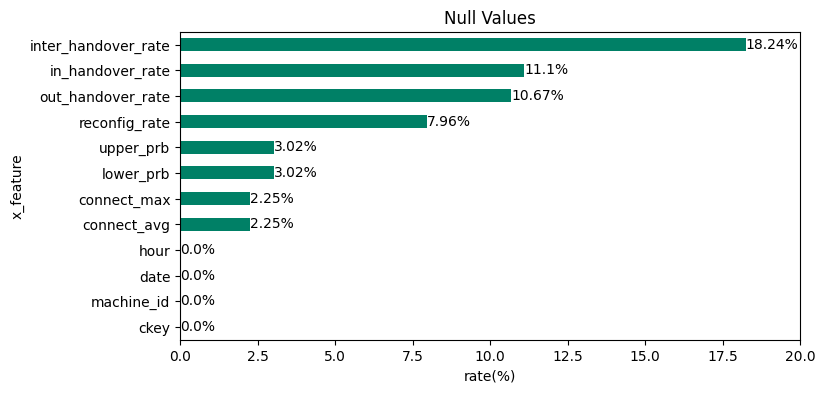

In [ ]:
null_df.plot(kind='barh', title = 'Null Values',
             xlabel='rate(%)', ylabel='x_feature',
             legend=False, figsize=(8,4), xlim=(0,20),
             colormap='summer')

for idx, val in enumerate(null_df.values):
    plt.text(val, idx-0.13, f'{np.round(val[0],2)}%')

plt.show()

<ipython-input-13-f5acac42a7b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-13-f5acac42a7b5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f', mask=mask)


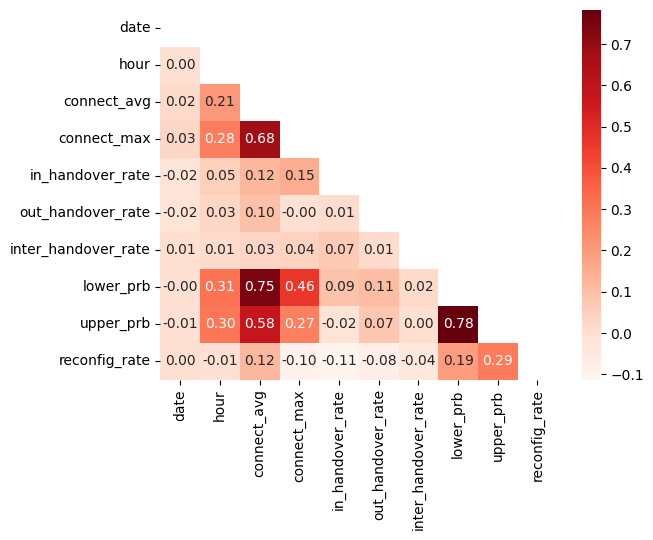

In [ ]:
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f', mask=mask)


plt.show()

# 3.machine_id컬럼

In [ ]:
print('기지국 기계 개수 :', df.machine_id.nunique())
print('기지국 기계 개수 :', df.machine_id.unique())

기지국 기계 개수 : 29
기지국 기계 개수 : ['MA1004_0' 'MA1004_10' 'MA1005_1' 'MA1005_2' 'MA1005_7' 'MA1005_8'
 'MA1019_11' 'MA1031_16' 'MA1034_1' 'MA1034_9' 'MA1037_4' 'MA1047_4'
 'MA1051_5' 'MA1052_18' 'MA1052_8' 'MA1066_18' 'MA1074_4' 'MA1084_11'
 'MA1101_5' 'MA1101_8' 'MA1111_37' 'MA1111_7' 'MA1112_32' 'MA1116_1'
 'MA1116_11' 'MA1117_22' 'MA1117_31' 'MA1129_17' 'MA1132_12']


In [ ]:
machine_df = df[['machine_id']].copy()
machine_df.loc[:, 'machine_id_front'] = machine_df['machine_id'].apply(lambda x : x.split('_')[0])
machine_df.loc[:, 'machine_id_back'] = machine_df['machine_id'].apply(lambda x : x.split('_')[1])

In [ ]:
machine_df.groupby(['machine_id_front', 'machine_id_back']).size().to_frame('count')

count
machine_id_front machine_id_back       
MA1004           0                 1464
                 10                1464
MA1005           1                 1464
                 2                 1464
                 7                 1464
                 8                 1464
MA1019           11                1464
MA1031           16                1464
MA1034           1                 1464
                 9                 1464
MA1037           4                 1464
MA1047           4                 1464
MA1051           5                 1464
MA1052           18                1464
                 8                 1464
MA1066           18                1464
MA1074           4                 1464
MA1084           11                1464
MA1101           5                 1464
                 8                 1464
MA1111           37                1464
                 7                 1464
MA1112           32                1464
MA1116           1                 1464
                 11                1464
MA1117           22                1464
                 31                1464
MA1129           17                1464
MA1132           12                1464

# 4.date컬럼

In [ ]:
df['year'] = df['date'].apply(lambda x:str(x)[:4])
df['month'] = df['date'].apply(lambda x:str(x)[4:6])
df['day'] = df['date'].apply(lambda x:str(x)[-2:])

In [ ]:
df['year'].unique(),\
df['month'].unique(),\
df['day'].unique()

(array(['2021'], dtype=object),
 array(['09', '10'], dtype=object),
 array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object))

In [ ]:
df.date.dtype
df['time'] = pd.to_datetime(df.date.astype('str') + '-' + df.hour.astype('str'), format='%Y%m%d-%H')
df['datetime'] = pd.to_datetime(df.date, format='%Y%m%d')

In [ ]:
df['dayofweek'] = df['datetime'].dt.weekday

In [ ]:
print('시작일', df.time.min())
print('종료일', df.time.max())

시작일 2021-09-01 00:00:00
종료일 2021-10-31 23:00:00


In [ ]:
df.head(2)

,ckey,machine_id,date,hour,connect_avg,connect_max,in_handover_rate,out_handover_rate,inter_handover_rate,lower_prb,upper_prb,reconfig_rate,year,month,day,time,datetime,dayofweek
0,MA1004_0-20210901-0,MA1004_0,20210901,0,27.913285,43.0,97.523220,100.0,100.0,45.402603,59.021408,100.409763,2021,09,01,2021-09-01 00:00:00,2021-09-01,2
1,MA1004_0-20210901-1,MA1004_0,20210901,1,23.013333,36.0,98.170732,NaN,100.0,36.740540,21.128778,99.953052,2021,09,01,2021-09-01 01:00:00,2021-09-01,2


# 5.feature별 특징
- in_handover _rate : 내 영역의 기지국에서 성공률 / 통신을 연결하는 전파
- out_handover _rate : 내 영역밖의 기지국에서 성공률
- inter_handover _rate : 세그먼트 끼리 넘어갈때 연결 성공률
- Lower_prb: 기지국 -> 내 핸드폰: 하향  
- Upper_prb: 내 핸드폰에서 기지국까지: 상향
- Reconfig_rate: 끊어져서 다시 연결할때 성공률

## 5.1 feature별 히스토그램

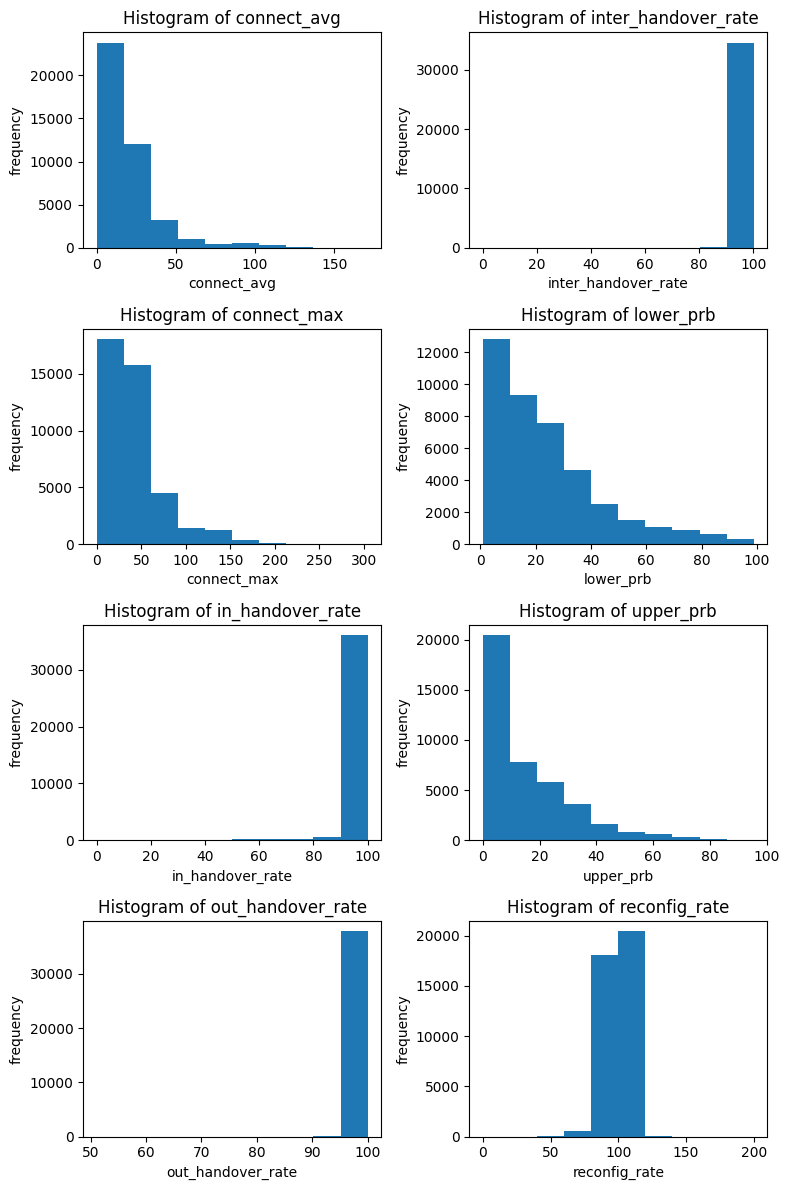

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8,12))

for idx, feature in enumerate(df.columns[4:12]):
    row = idx % 4
    col = idx // 4
    axes[row, col].hist(data=df, x=feature, )
    axes[row, col].set_title(f'Histogram of {feature}', fontdict={'size':12, 'weight':'normal'})
    axes[row, col].set_xlabel(f'{feature}')
    axes[row, col].set_ylabel('frequency')
    plt.tight_layout()
plt.show()


## 5.2feature별 특징 파악

### 5.2.1 connect_avg

In [ ]:
df.columns

Index(['ckey', 'machine_id', 'date', 'hour', 'connect_avg', 'connect_max',
       'in_handover_rate', 'out_handover_rate', 'inter_handover_rate',
       'lower_prb', 'upper_prb', 'reconfig_rate', 'year', 'month', 'day',
       'time', 'datetime', 'dayofweek'],
      dtype='object')

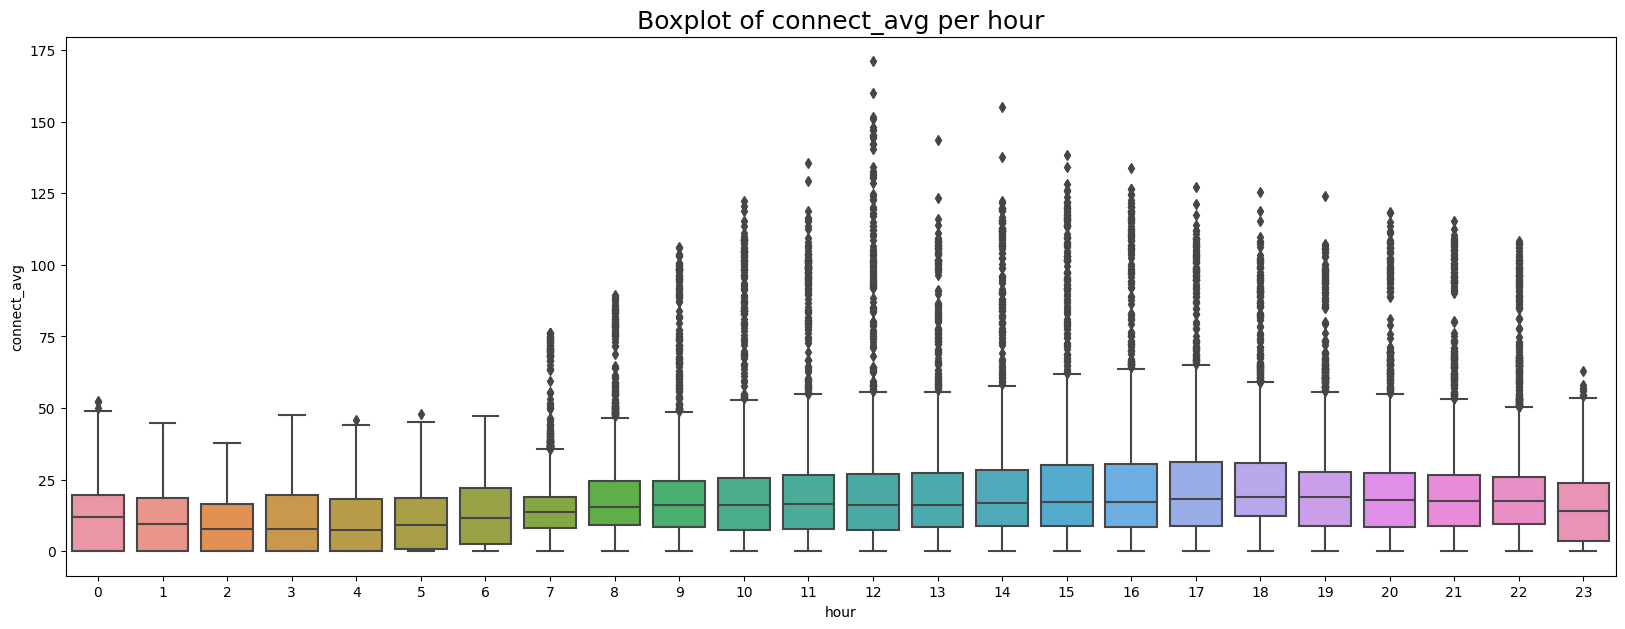

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df, y='connect_avg', x='hour')
plt.title('Boxplot of connect_avg per hour', fontsize=18)
plt.show()

<Axes: xlabel='hour', ylabel='connect_max'>

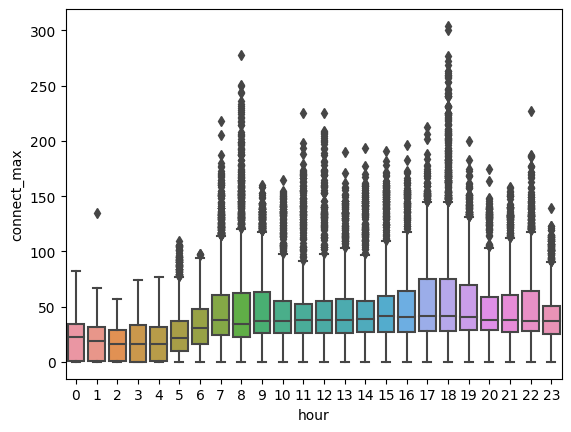

In [ ]:
sns.boxplot(data=df, y='connect_max', x='hour')

In [ ]:
df.groupby('machine_id')['connect_avg'].agg(['mean', 'std'])

,mean,std
machine_id,,
MA1004_0,24.063495,4.653041
MA1004_10,36.635651,7.878145
MA1005_1,17.534308,5.573715
MA1005_2,20.279460,8.800847
MA1005_7,33.386464,17.158242
MA1005_8,17.946375,6.491416
MA1019_11,5.954368,2.580339
MA1031_16,33.585831,24.032947
MA1034_1,16.052681,6.815977


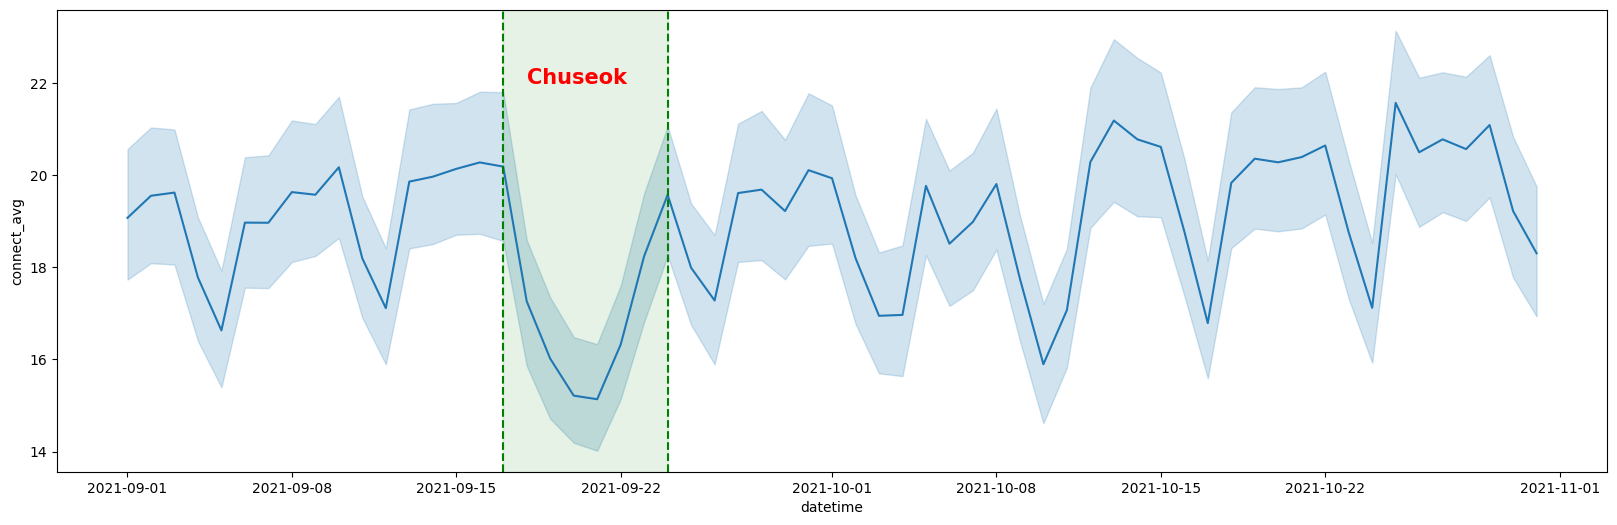

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x = df.datetime, y = df.connect_avg)
plt.axvspan(pd.Timestamp('2021-09-17'), pd.Timestamp('2021-09-24'), color='green', alpha=0.1)
plt.axvline(pd.Timestamp('2021-09-17'), linestyle = "--", color='green')
plt.axvline(pd.Timestamp('2021-09-24'), linestyle = "--", color='green')
plt.text(pd.Timestamp('2021-09-18'), 22, 'Chuseok', color='red', fontsize = 15, fontweight='semibold')
plt.show()

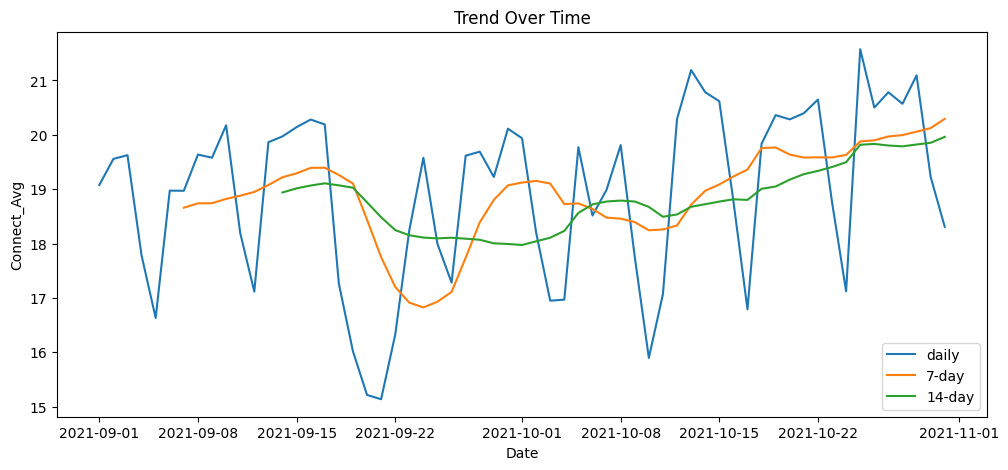

In [ ]:
daily_connect = df.resample('D', on='datetime').mean(numeric_only=True)['connect_avg']
daily_connect_rolling_7d = daily_connect.rolling(window=7).mean()
daily_connect_rolling_14d = daily_connect.rolling(window=14).mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_connect.index, y=daily_connect.values, label='daily')
sns.lineplot(x=daily_connect_rolling_7d.index, y=daily_connect_rolling_7d.values, label='7-day')
sns.lineplot(x=daily_connect_rolling_14d.index, y=daily_connect_rolling_14d.values, label='14-day')
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Connect_Avg')
plt.legend(loc='lower right')
plt.show()

### 5.2.2 connect_max

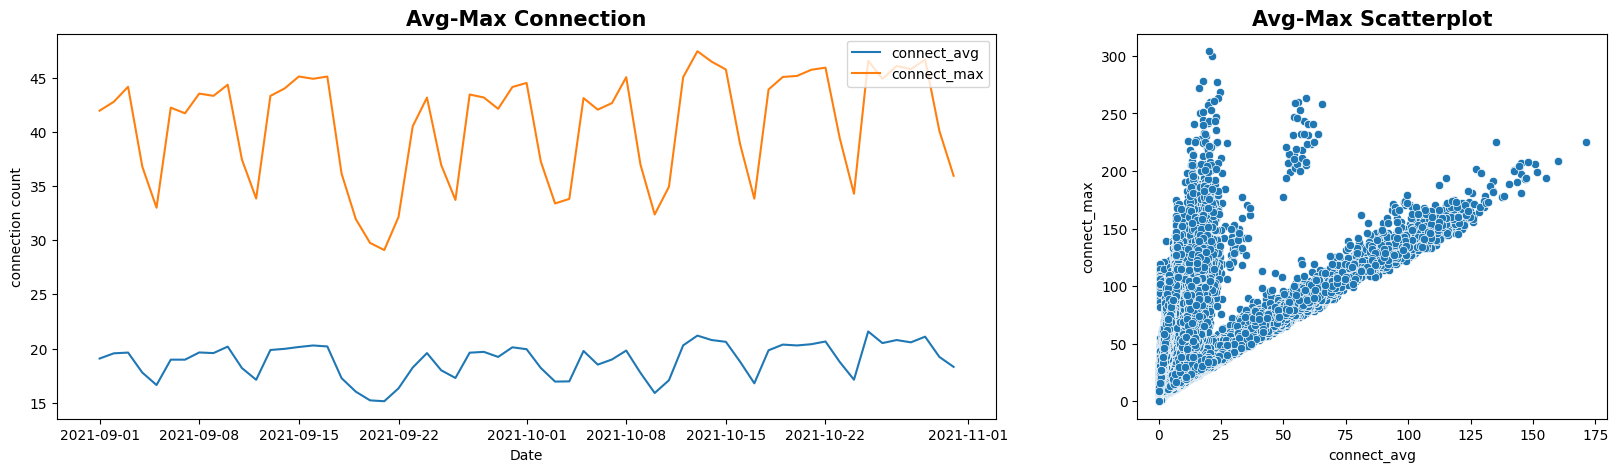

In [ ]:
daily_avg = df.resample('D', on='datetime').mean(numeric_only=True)['connect_avg']
daily_max = df.resample('D', on='datetime').mean(numeric_only=True)['connect_max']

fig, axs = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(20, 5))
sns.lineplot(x=daily_avg.index, y=daily_avg.values, label='connect_avg', ax=axs[0])
sns.lineplot(x=daily_max.index, y=daily_max.values, label='connect_max', ax=axs[0])
axs[0].set_title('Avg-Max Connection', fontsize=15, fontweight='semibold')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('connection count')
axs[0].legend(loc='upper right')

sns.scatterplot(x=df.connect_avg, y=df.connect_max, ax=axs[1])
axs[1].set_title('Avg-Max Scatterplot', fontsize=15, fontweight='semibold')
axs[1].set_xlabel('connect_avg')
axs[1].set_ylabel('connect_max')
plt.show()

In [ ]:
df.groupby('dayofweek')[['connect_avg', 'connect_max']].agg(['mean', 'std'])

connect_avg            connect_max           
                 mean        std        mean        std
dayofweek                                              
0           18.650687  19.342508   39.769287  33.030066
1           19.339315  19.919937   42.010846  35.829899
2           19.446705  19.921806   42.791182  36.250354
3           19.823122  20.129622   43.993115  36.927384
4           20.185882  20.560929   44.953662  37.863996
5           18.220446  18.706381   37.766678  27.514947
6           16.906128  17.321033   33.592799  24.171561

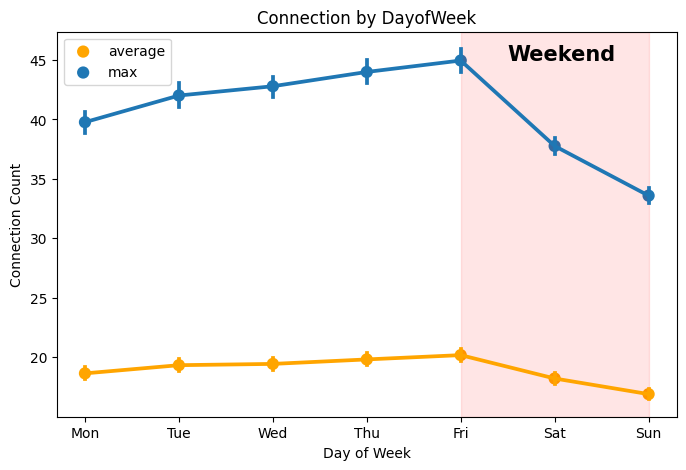

In [ ]:
plt.figure(figsize=(8,5))
sns.pointplot(data = df, x='dayofweek', y='connect_avg', label='average', color='orange')
sns.pointplot(data = df, x='dayofweek', y='connect_max', label='max')
plt.axvspan(4,6,color='red', alpha=0.1)
plt.text(4.5, 45, 'Weekend', fontdict={'size':15, 'weight':'semibold'})
plt.title('Connection by DayofWeek')
plt.xlabel('Day of Week')
plt.ylabel('Connection Count')
plt.legend()
plt.xticks(ticks=range(df['dayofweek'].nunique()), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Text(0.5, 1.0, 'Connection Max')

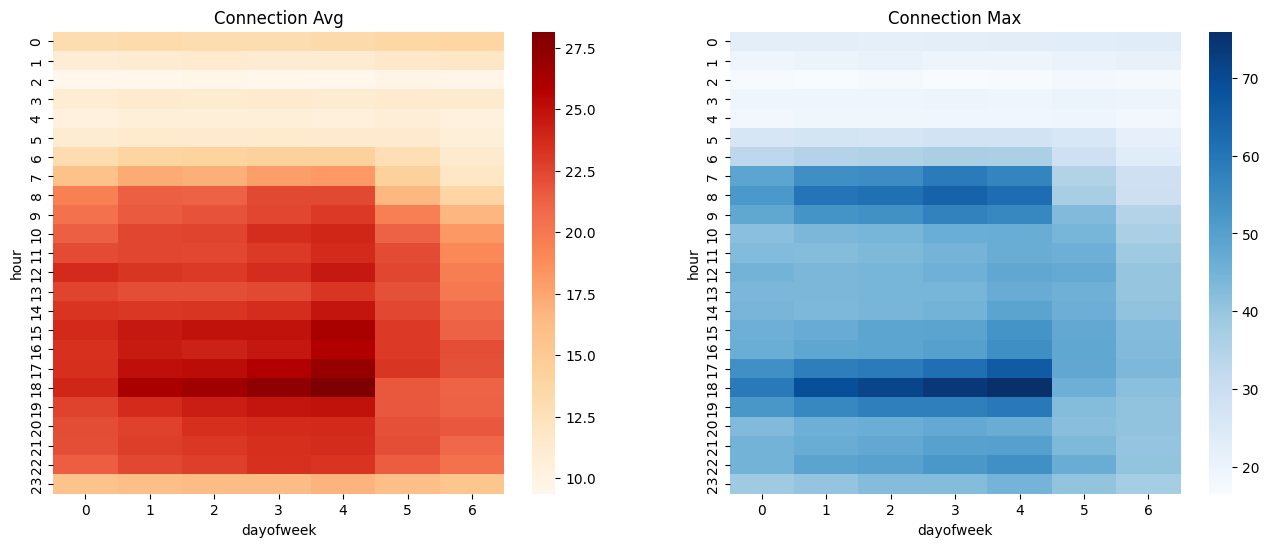

In [ ]:
connect_avg_pv = df.pivot_table(values='connect_avg', index='hour', columns='dayofweek')
connect_max_pv = df.pivot_table(values='connect_max', index='hour', columns='dayofweek')

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.heatmap(data=connect_avg_pv, cmap='OrRd')
plt.title('Connection Avg')
plt.subplot(122)
sns.heatmap(data=connect_max_pv, cmap='Blues')
plt.title('Connection Max')

In [ ]:
check_cols = ['connect_avg', 'connect_max']
check_per_id = df.groupby('machine_id')[check_cols].agg(['mean', 'median'])
check_per_id.style.background_gradient()

### 5.2.3 in_handover_rate

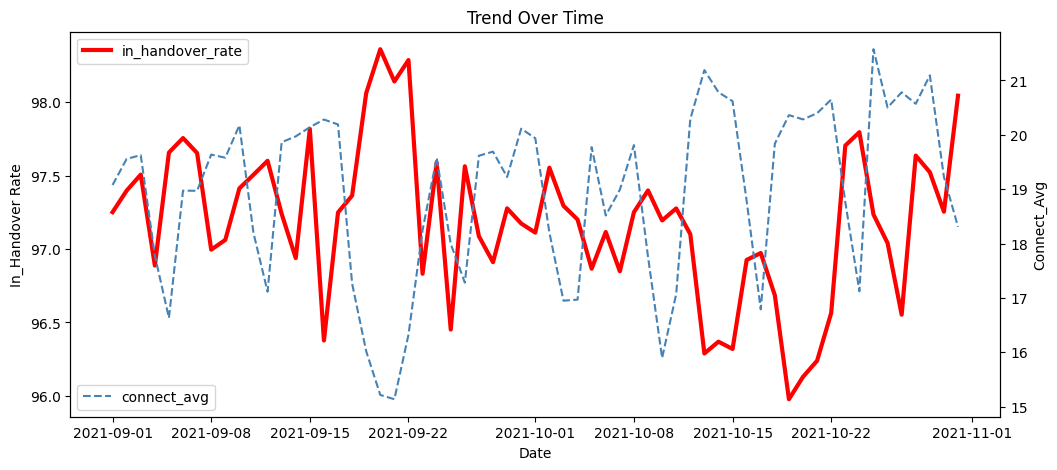

In [ ]:
daily_in_handover = df.resample('D', on='datetime').mean(numeric_only=True)['in_handover_rate']
daily_connect = df.resample('D', on='datetime').mean(numeric_only=True)['connect_avg']

plt.figure(figsize=(12, 5))
ax1 = sns.lineplot(x=daily_in_handover.index, y=daily_in_handover.values, label='in_handover_rate', color='red', lw=3, ls='-')
plt.legend(loc='upper left')
ax1.set_ylabel('In_Handover Rate')
ax1.set_xlabel('Date')
ax1.set_title('Trend Over Time')

ax2 = ax1.twinx()

sns.lineplot(x=daily_connect.index, y=daily_connect.values, label='connect_avg', color='steelblue', ls='--', ax=ax2)
ax2.set_ylabel('Connect_Avg')
plt.legend(loc='lower left')
plt.show()

### 5.2.4 out_handover_rate

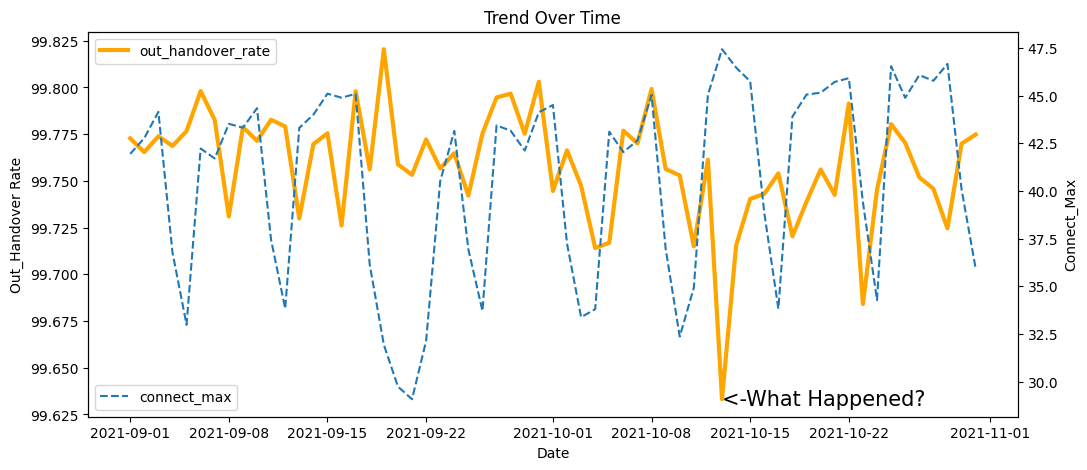

In [ ]:
daily_out_handover = df.resample('D', on='datetime').mean(numeric_only=True)['out_handover_rate']
daily_connect = df.resample('D', on='datetime').mean(numeric_only=True)['connect_max']

plt.figure(figsize=(12, 5))
ax1 = sns.lineplot(x=daily_out_handover.index, y=daily_out_handover.values, label='out_handover_rate', color='orange', lw=3)
plt.legend(loc='upper left')
ax1.set_ylabel('Out_Handover Rate')
ax1.set_xlabel('Date')
ax1.set_title('Trend Over Time')
plt.text(pd.Timestamp('2021-10-13'), 99.63, '<-What Happened?', fontsize=15, fontweight='normal')
ax2 = ax1.twinx()

sns.lineplot(x=daily_connect.index, y=daily_connect.values, ls='--', label='connect_max', ax=ax2)
ax2.set_ylabel('Connect_Max')
plt.legend(loc='lower left')
plt.show()

In [ ]:
problem_df = df[(df['datetime'] >= pd.Timestamp('2021-10-02')) & (df['datetime'] <= pd.Timestamp('2021-10-07'))]
problem_df = problem_df.groupby(['machine_id', 'datetime'])['out_handover_rate'].mean().reset_index()

fig = px.line(problem_df, x='datetime', y='out_handover_rate', color='machine_id', title='out_handover_rate from 10/2 to 10/7')
fig.update_layout(title_x = 0.5,
                  title_font_size=20)
fig.show()

In [ ]:
import plotly.express as px

problem_df = df[(df['datetime'] >= pd.Timestamp('2021-10-10')) & (df['datetime'] <= pd.Timestamp('2021-10-15'))]
problem_df = problem_df.groupby(['machine_id', 'datetime'])['out_handover_rate'].mean().reset_index()

fig = px.line(problem_df, x='datetime', y='out_handover_rate', color='machine_id', title='out_handover_rate from 10/10 to 10/15')
fig.update_layout(title_x = 0.5,
                  title_font_size=20)
fig.show()

# plt.figure(figsize=(16,5))
# sns.lineplot(data = problem_df, x = 'datetime', y='out_handover_rate', hue='machine_id')
# plt.legend()
# plt.show()

In [ ]:
# inhand_q5 = df.in_handover_rate.quantile(0.05)
# inhand_q1 = df.in_handover_rate.quantile(0.01)
# print('inhand 95:{}, inhand99:{}'.format(inhand_q5, inhand_q1))

# outhand_q5 = df.out_handover_rate.quantile(0.05)
# outhand_q1 = df.out_handover_rate.quantile(0.01)
# print('outhand 95:{}, outhand99:{}'.format(outhand_q5, outhand_q1))

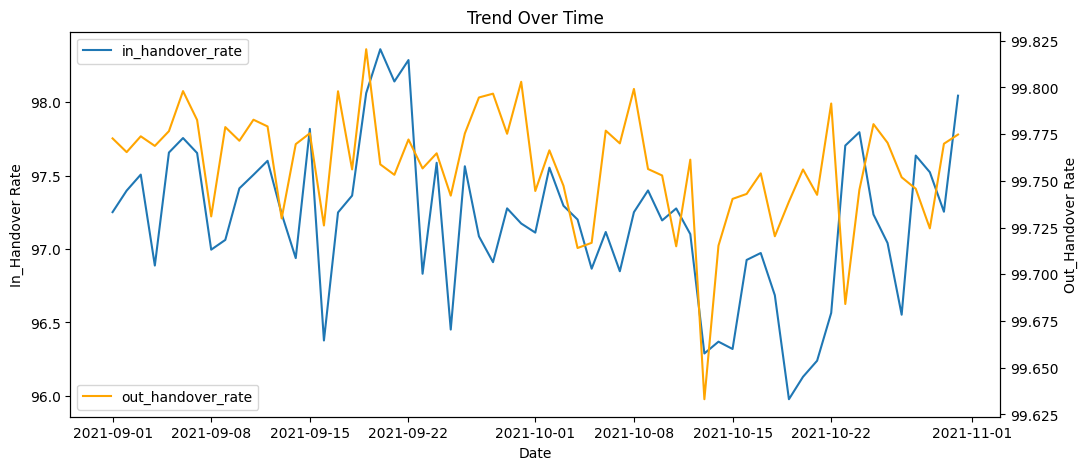

In [ ]:
daily_in_handover = df.resample('D', on='datetime').mean(numeric_only=True)['in_handover_rate']
daily_out_handover = df.resample('D', on='datetime').mean(numeric_only=True)['out_handover_rate']

plt.figure(figsize=(12, 5))
ax1 = sns.lineplot(x=daily_in_handover.index, y=daily_in_handover.values, label='in_handover_rate')
plt.legend(loc='upper left')
ax1.set_ylabel('In_Handover Rate')
ax1.set_xlabel('Date')
ax1.set_title('Trend Over Time')
# plt.axhspan(inhand_q5, 100, color='steelblue', alpha=0.1)

ax2 = ax1.twinx()

sns.lineplot(x=daily_out_handover.index, y=daily_out_handover.values, label='out_handover_rate',  color='orange', ax=ax2)
ax2.set_ylabel('Out_Handover Rate')
plt.legend(loc='lower left')
# plt.axhspan(outhand_q5, 100, color='orange', alpha=0.1)
plt.show()

In [ ]:
check_cols = ['in_handover_rate', 'out_handover_rate']
check_per_id = df.groupby('machine_id')[check_cols].agg(['mean', 'median'])
check_per_id.style.background_gradient()

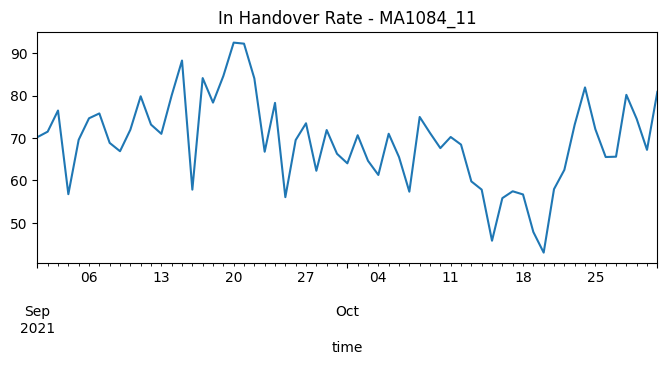

In [ ]:
plt.figure(figsize=(8,3))
df[df.machine_id == 'MA1084_11'].resample('D', on='time')['in_handover_rate'].mean().plot(kind='line')
plt.title('In Handover Rate - MA1084_11')
plt.show()

### 5.2.5 lower_prb & upper_prb

In [ ]:
df.columns

Index(['ckey', 'machine_id', 'date', 'hour', 'connect_avg', 'connect_max',
       'in_handover_rate', 'out_handover_rate', 'inter_handover_rate',
       'lower_prb', 'upper_prb', 'reconfig_rate', 'year', 'month', 'day',
       'time', 'datetime', 'dayofweek'],
      dtype='object')

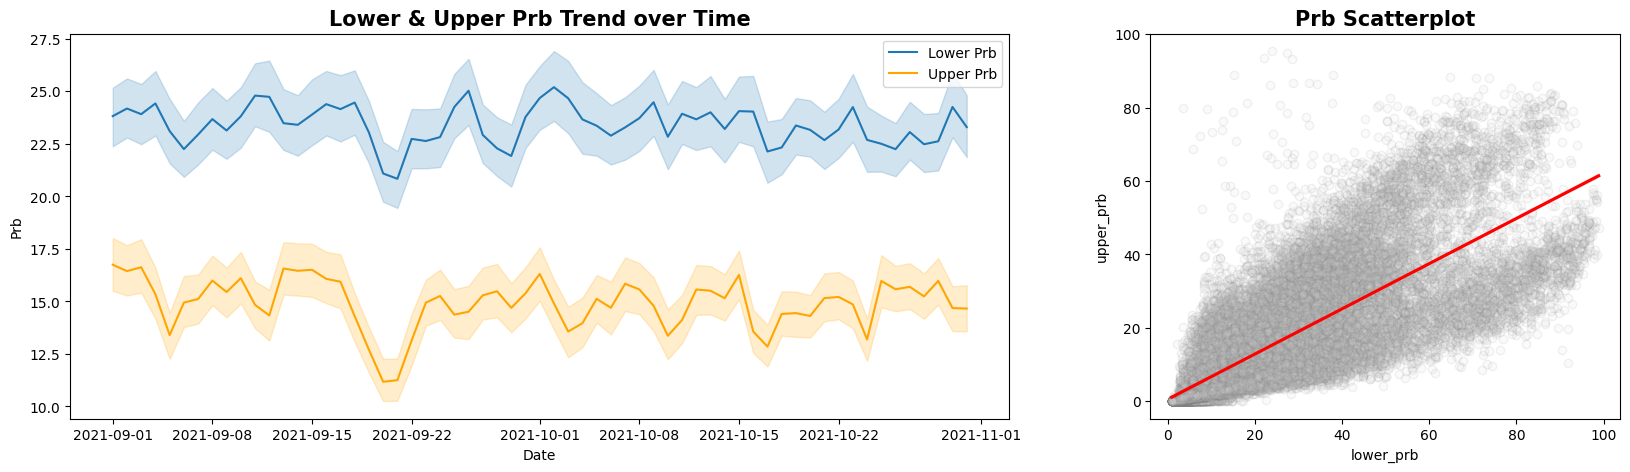

In [ ]:
fig, axs = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(20, 5))
sns.lineplot(data=df, x='datetime', y='lower_prb', label='Lower Prb', ax=axs[0])
sns.lineplot(data=df, x='datetime', y='upper_prb', color='orange', label='Upper Prb', ax=axs[0])
axs[0].set_title('Lower & Upper Prb Trend over Time', fontsize=15, fontweight='semibold')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Prb')
axs[0].legend(loc='upper right')

sns.regplot(x=df.lower_prb, y=df.upper_prb, ax=axs[1], scatter_kws={"fc":"lightgray", "ec":"gray", 'alpha':0.1}, color='r')
axs[1].set_title('Prb Scatterplot', fontsize=15, fontweight='semibold')
axs[1].set_xlabel('lower_prb')
axs[1].set_ylabel('upper_prb')
plt.show()

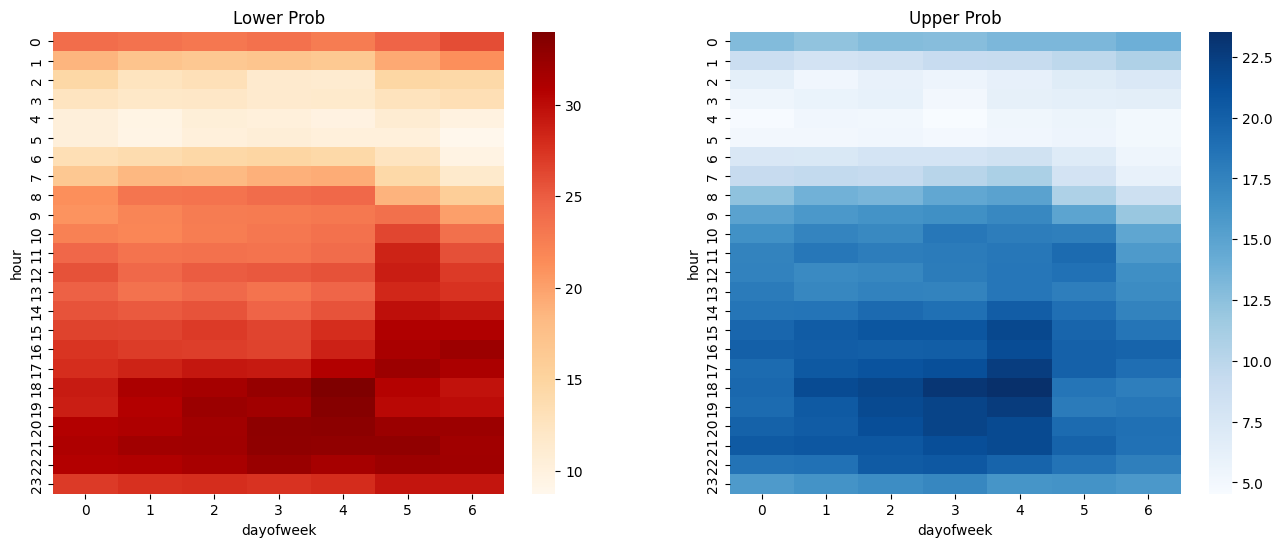

In [ ]:
lower_prb_pv = df.pivot_table(values='lower_prb', index='hour', columns='dayofweek')
upper_prb_pv = df.pivot_table(values='upper_prb', index='hour', columns='dayofweek')

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.heatmap(data=lower_prb_pv, cmap='OrRd')
plt.title('Lower Prob')
plt.subplot(122)
sns.heatmap(data=upper_prb_pv, cmap='Blues')
plt.title('Upper Prob')
plt.show()

In [ ]:
check_cols = ['lower_prb', 'upper_prb']
check_per_id = df.groupby('machine_id')[check_cols].agg(['mean', 'median'])
check_per_id.style.background_gradient()

In [ ]:
df['machine_group'] = df['machine_id'].apply(lambda x:x.split('_')[0])

In [ ]:
# plt.figure(figsize=(16,7))
# sns.boxplot(data = df, x='machine_group', y='lower_prb')
# sns.stripplot(data = df, x="machine_group", y="lower_prb", alpha=0.2)


### 5.2.6 reconfig_rate

In [ ]:
df.reconfig_rate.describe()

count    39075.000000
mean        98.757858
std          5.860943
min          0.000000
25%         97.416872
50%        100.053670
75%        101.513767
max        200.000000
Name: reconfig_rate, dtype: float64

(90.03300827255805, 105.64398317516608)

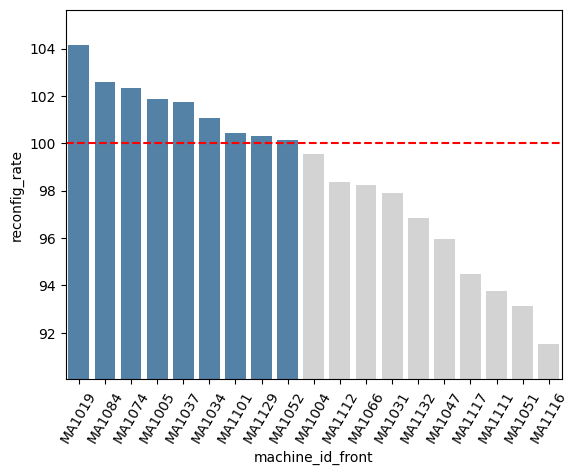

In [ ]:
tmp = df[['machine_id', 'reconfig_rate']].copy()
# groupby('machine_id').mean()

tmp.loc[:, 'machine_id_front'] = tmp['machine_id'].apply(lambda x : x.split('_')[0])
tmp.loc[:, 'machine_id_back'] = tmp['machine_id'].apply(lambda x : x.split('_')[1])

color_list = ['steelblue' if val >= 100 else 'lightgrey' for val in tmp.groupby('machine_id_front')['reconfig_rate'].mean().sort_values(ascending=False).values]
reconfig_gp = tmp.groupby('machine_id_front')[['reconfig_rate']].mean().sort_values(by='reconfig_rate', ascending=False).reset_index()
sns.barplot(data = reconfig_gp, x='machine_id_front', y= 'reconfig_rate', palette = color_list)
max_reconfig = np.max(tmp.groupby('machine_id_front')[['reconfig_rate']].mean().values)
min_reconfig = np.min(tmp.groupby('machine_id_front')[['reconfig_rate']].mean().values)

plt.xticks(rotation=60)
plt.axhline(100, linestyle='--', color='red')
plt.ylim((min_reconfig-1.5,max_reconfig+1.5))

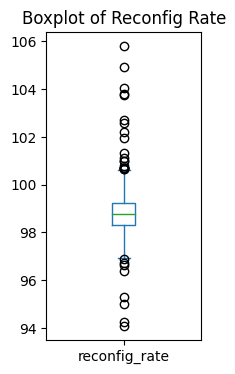

In [ ]:
df.resample('H', on='time').mean(numeric_only=True)['reconfig_rate'].plot(kind='box',
                                                                          figsize=(2,4),
                                                                          title='Boxplot of Reconfig Rate')
plt.show()

In [ ]:
q1 = df.resample('H', on='time').mean(numeric_only=True)['reconfig_rate'].quantile(0.25)
q2 = df.resample('H', on='time').mean(numeric_only=True)['reconfig_rate'].quantile(0.5)
q3 = df.resample('H', on='time').mean(numeric_only=True)['reconfig_rate'].quantile(0.75)
print('Reconfig Rate Q1: {}, Q2: {}, Q3: {}'.format(q1, q2, q3))

Reconfig Rate Q1: 98.30874431713363, Q2: 98.75418983844827, Q3: 99.23976571372016


In [ ]:
iqr = q3 - q1
min_reconfig = q1 - 1.5*iqr
max_reconfig = q3 + 1.5*iqr

In [ ]:
df.resample('H', on='time').mean(numeric_only=True)['reconfig_rate'].describe()

count    1464.000000
mean       98.789200
std         0.822024
min        94.077317
25%        98.308744
50%        98.754190
75%        99.239766
max       105.803491
Name: reconfig_rate, dtype: float64

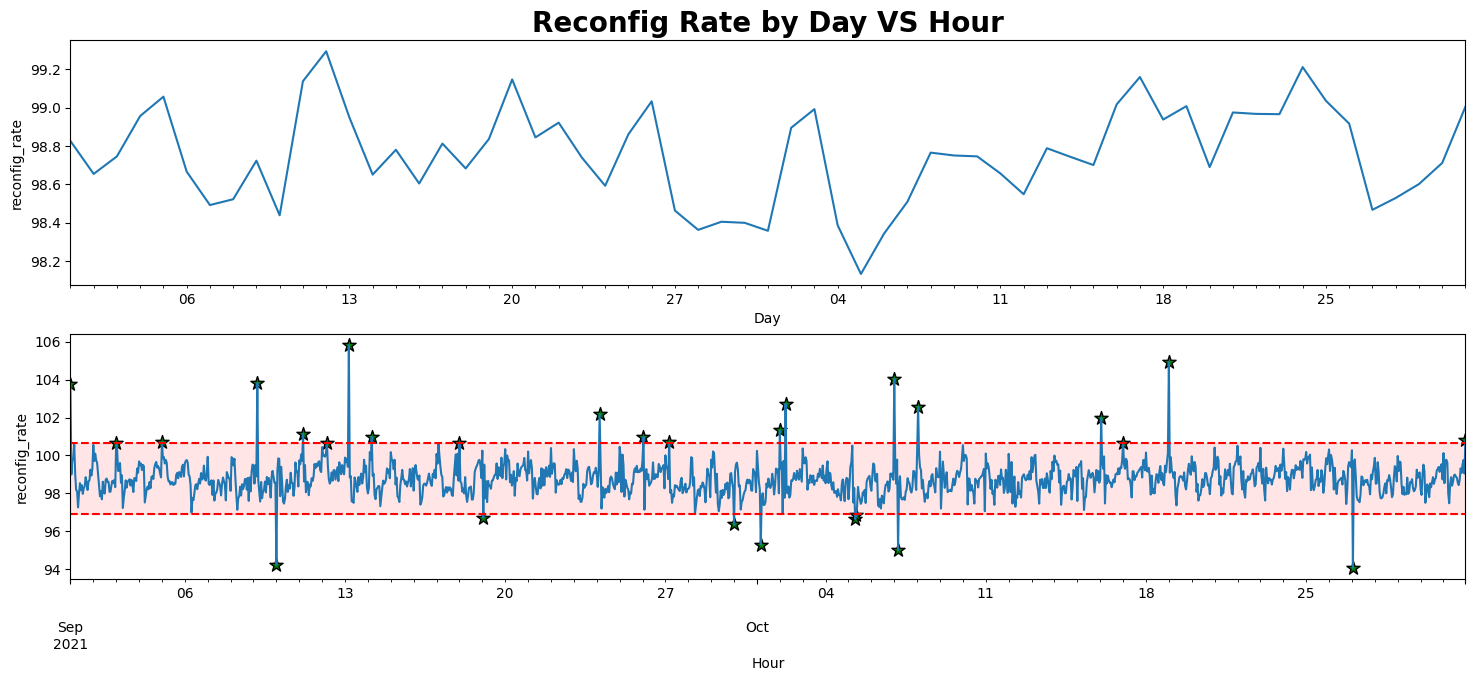

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(18,7))
df.resample('D', on='datetime').mean(numeric_only=True)['reconfig_rate'].plot(kind='line', ax=axs[0])
axs[0].set_title('Reconfig Rate by Day VS Hour', fontsize=20, fontweight='semibold')
axs[0].set_ylabel('reconfig_rate')
axs[0].set_xlabel('Day')
axs[0].set_xticks([], [])
df.resample('H', on='time').mean(numeric_only=True)['reconfig_rate'].plot(kind='line', ax=axs[1])
axs[1].set_ylabel('reconfig_rate')
axs[1].set_xlabel('Hour')
axs[1].axhspan(min_reconfig, max_reconfig, color='red', alpha=0.1)
axs[1].axhline(min_reconfig, ls='--', color='red')
axs[1].axhline(max_reconfig, ls='--', color='red')

hourly_reconfig = df.resample('H', on='time').mean(numeric_only=True)['reconfig_rate']
reconfig_anomalies = hourly_reconfig[(hourly_reconfig > max_reconfig) | (hourly_reconfig < min_reconfig)]

for time, rate in reconfig_anomalies.to_frame().iterrows():
    axs[1].scatter(time, rate, marker='*', edgecolor='black', color='green', s=100)

plt.show()

In [ ]:
reconfig_anomalies_new =reconfig_anomalies.reset_index()
reconfig_anomalies_new['month'] =reconfig_anomalies_new['time'].dt.month
reconfig_anomalies_new['day'] =reconfig_anomalies_new['time'].dt.day
reconfig_anomalies_new['dayofweek'] =reconfig_anomalies_new['time'].dt.dayofweek
reconfig_anomalies_new['hour'] =reconfig_anomalies_new['time'].dt.hour
reconfig_anomalies_new['dayofweek_s'] = reconfig_anomalies_new['dayofweek'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

reconfig_anomalies_new.head(10)

,time,reconfig_rate,month,day,dayofweek,hour,dayofweek_s
0,2021-09-01 00:00:00,103.739524,9,1,2,0,Wed
1,2021-09-03 00:00:00,100.657813,9,3,4,0,Fri
2,2021-09-05 00:00:00,100.696687,9,5,6,0,Sun
3,2021-09-09 04:00:00,103.812090,9,9,3,4,Thu
4,2021-09-10 00:00:00,94.238916,9,10,4,0,Fri
5,2021-09-11 04:00:00,101.136687,9,11,5,4,Sat
6,2021-09-12 05:00:00,100.683380,9,12,6,5,Sun
7,2021-09-13 04:00:00,105.803491,9,13,0,4,Mon
8,2021-09-14 04:00:00,100.984331,9,14,1,4,Tue
9,2021-09-18 00:00:00,100.670017,9,18,5,0,Sat


In [ ]:
# reconfig_anomalies_new.groupby(['dayofweek', 'dayofweek_s']).size().reset_index().sort_values(by='dayofweek').plot(kind='bar', x='dayofweek_s', y=0, title = 'Anomalies by DayofWeek', rot=0)

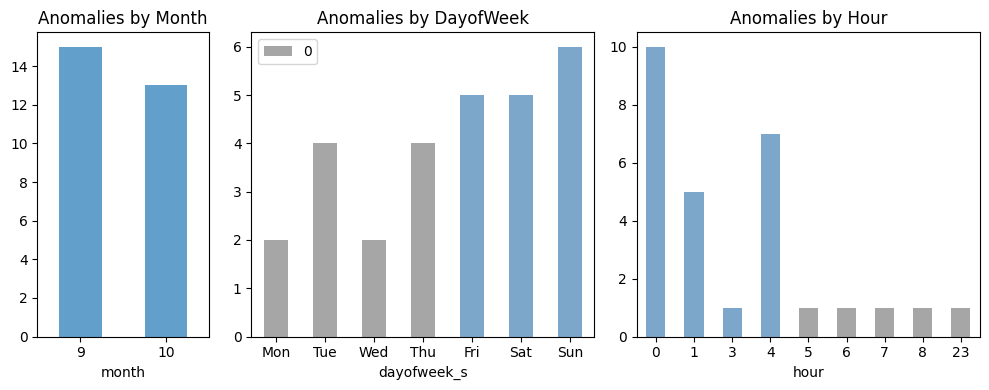

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,4), width_ratios=(1,2,2))
reconfig_anomalies_new.groupby(['month']).size().plot(kind='bar',
                                                      title = 'Anomalies by Month',
                                                      rot=0,
                                                      ax = axs[0],
                                                      alpha=0.7)

reconfig_anomalies_new.groupby(['dayofweek', 'dayofweek_s']).size().reset_index().sort_values(by='dayofweek').plot(kind='bar',
                                                                                                                   x='dayofweek_s',
                                                                                                                   y=0,
                                                                                                                   title = 'Anomalies by DayofWeek',
                                                                                                                   rot=0,
                                                                                                                   ax = axs[1],
                                                                                                                   color=['grey', 'grey', 'grey', 'grey','steelblue', 'steelblue', 'steelblue'],
                                                                                                                   alpha=0.7)

reconfig_anomalies_new.groupby(['hour']).size().plot(kind='bar',
                                                     title = 'Anomalies by Hour',
                                                     rot=0,
                                                     ax = axs[2],
                                                     color=['steelblue', 'steelblue', 'steelblue', 'steelblue', 'grey', 'grey', 'grey', 'grey', 'grey'],
                                                     alpha=0.7)

plt.tight_layout()
plt.show()

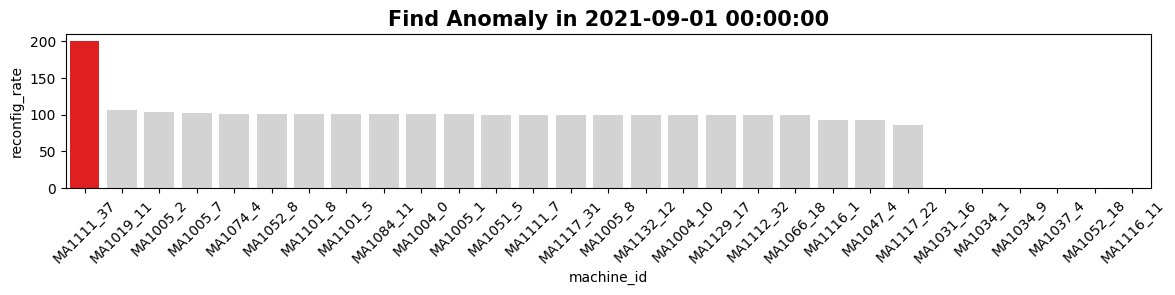

In [ ]:
time = '2021-09-01 00:00:00'
anomaly_machine = df[df.time == pd.Timestamp(time)][['machine_id', 'reconfig_rate']].sort_values(by='reconfig_rate', ascending=False).fillna(0)

color_list = ['red' if val >= anomaly_machine['reconfig_rate'].mean() + 2*anomaly_machine['reconfig_rate'].std() else 'lightgrey' for val in  anomaly_machine['reconfig_rate'] ]

plt.figure(figsize = (14, 2))
sns.barplot(data = anomaly_machine,
            x='machine_id',
            y='reconfig_rate',
            order = anomaly_machine['machine_id'].values,
            palette=color_list)
plt.title(f'Find Anomaly in {time}', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

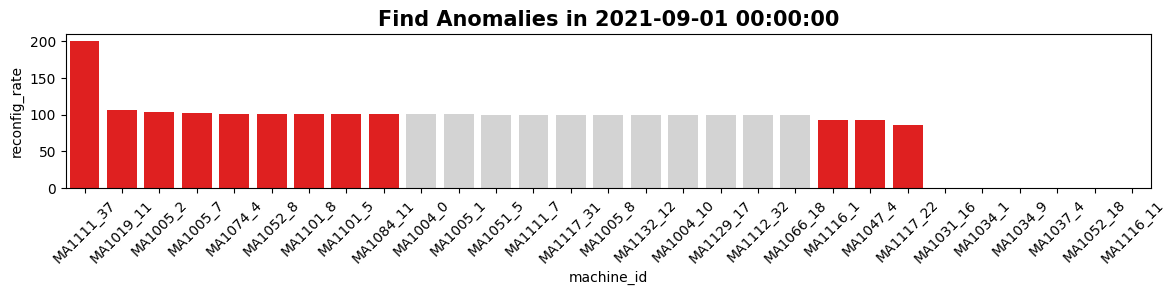

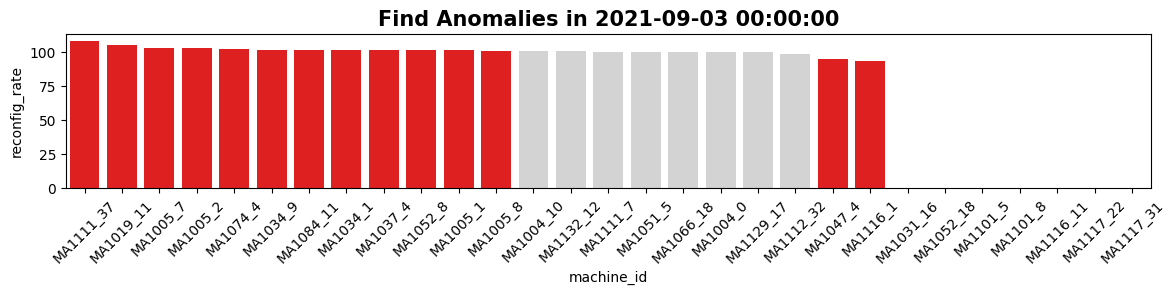

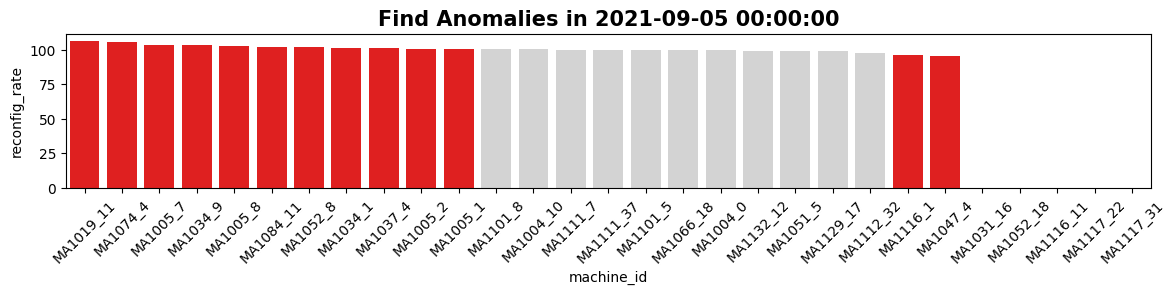

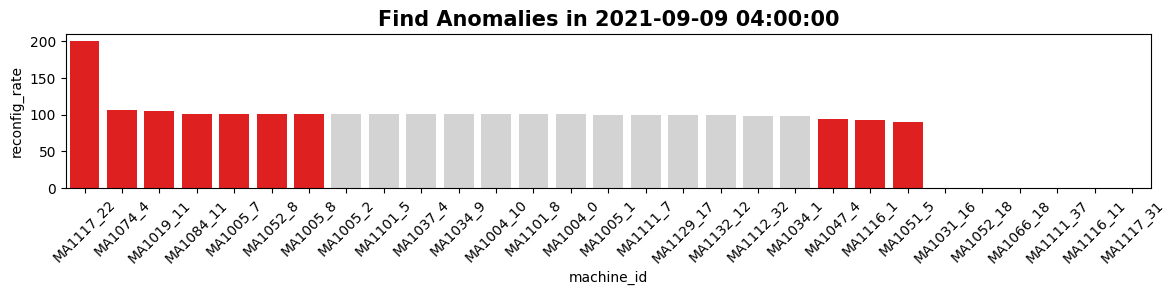

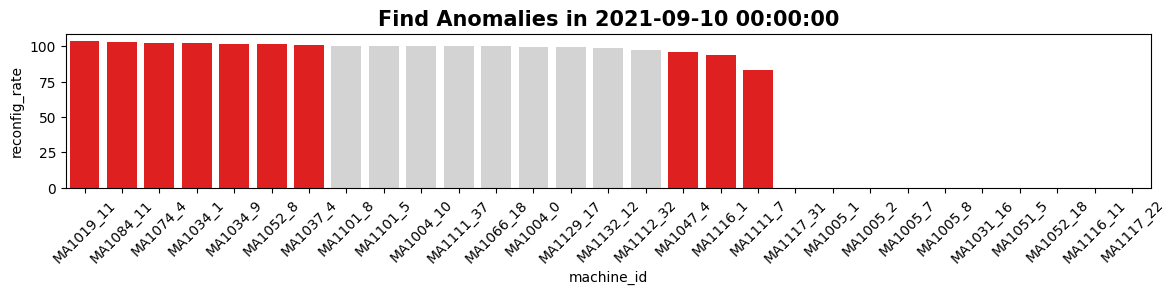

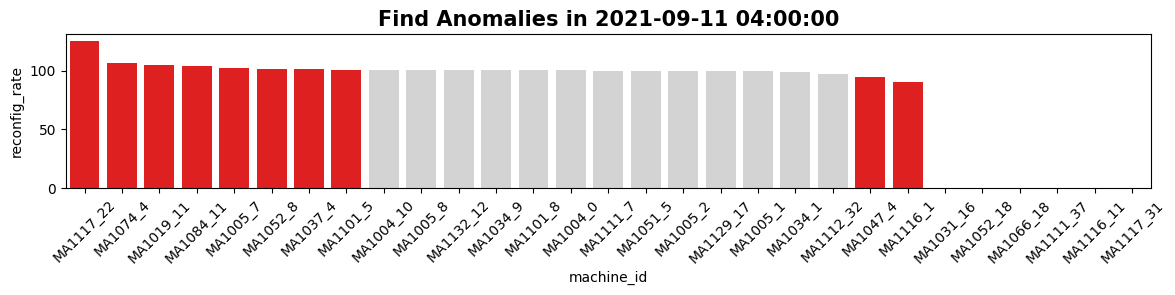

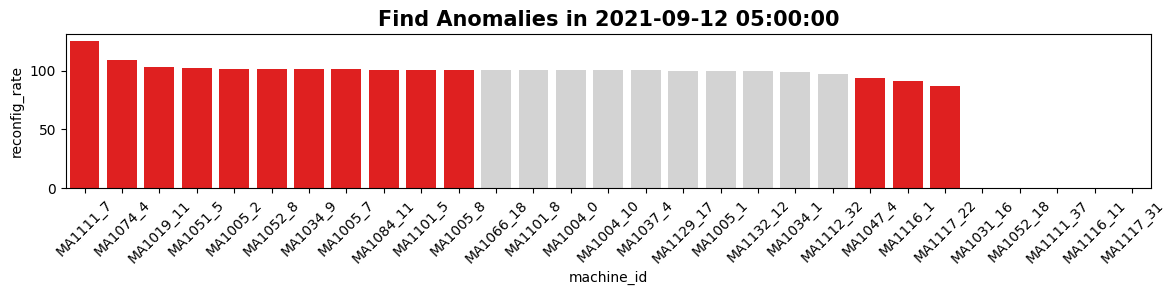

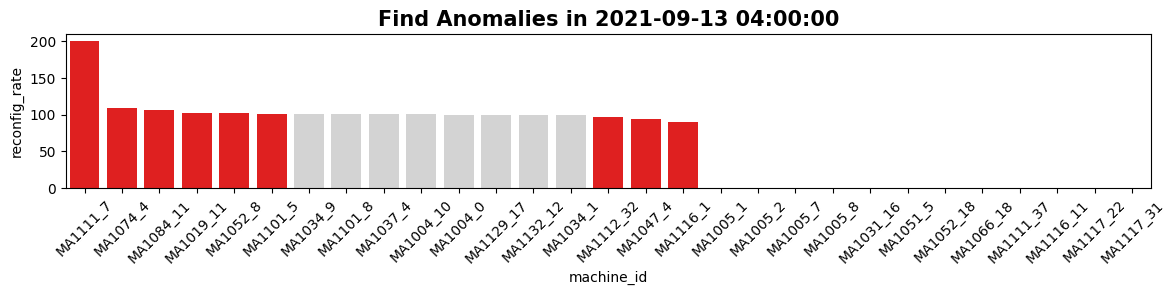

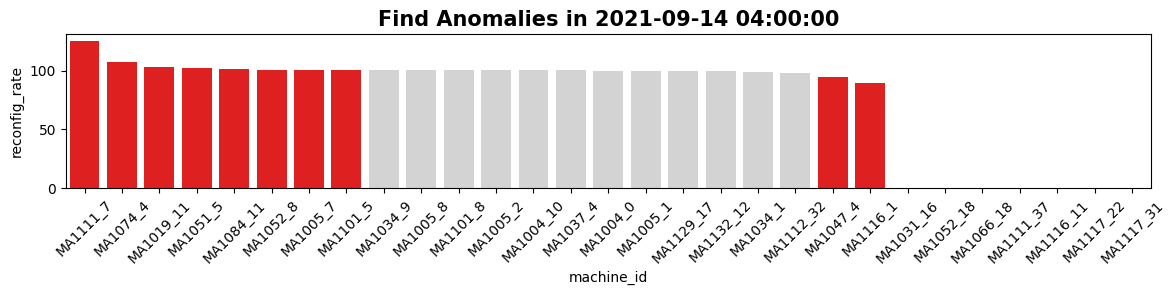

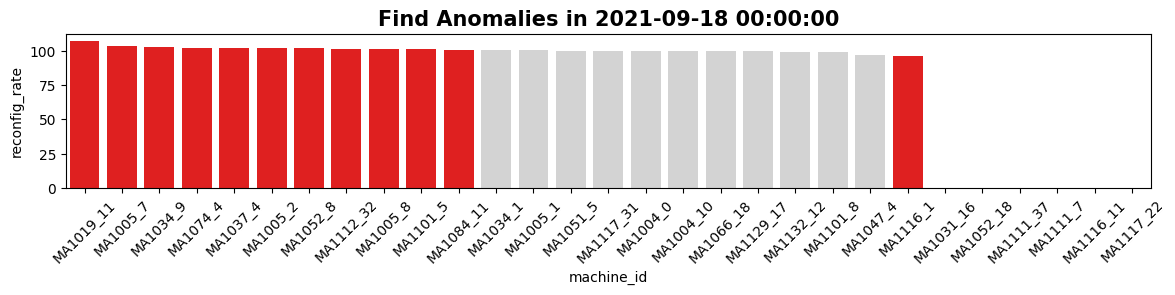

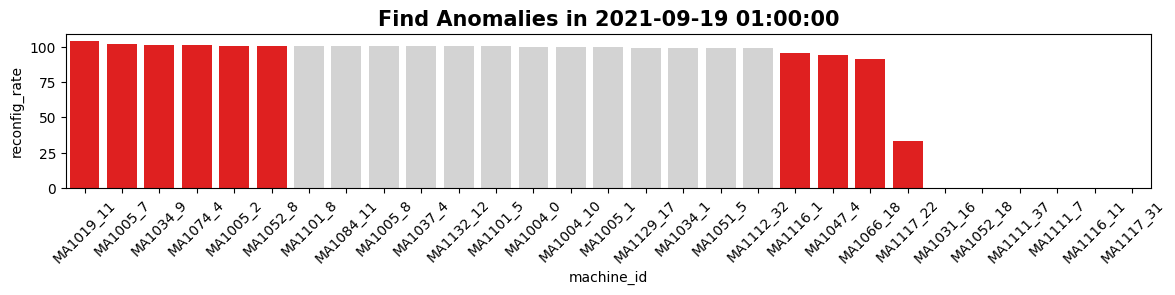

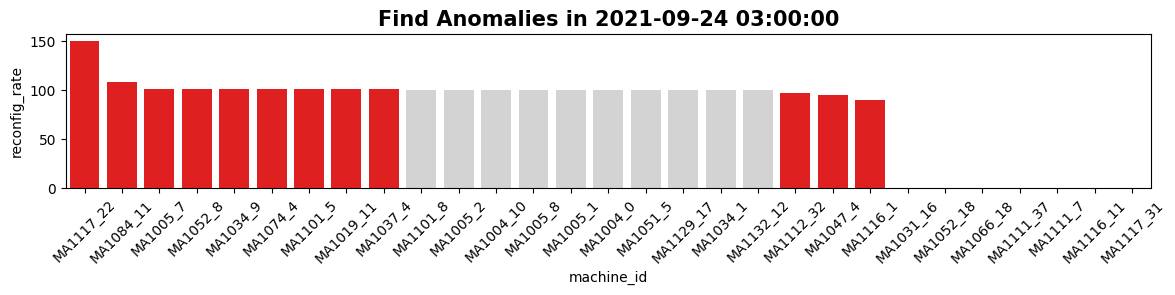

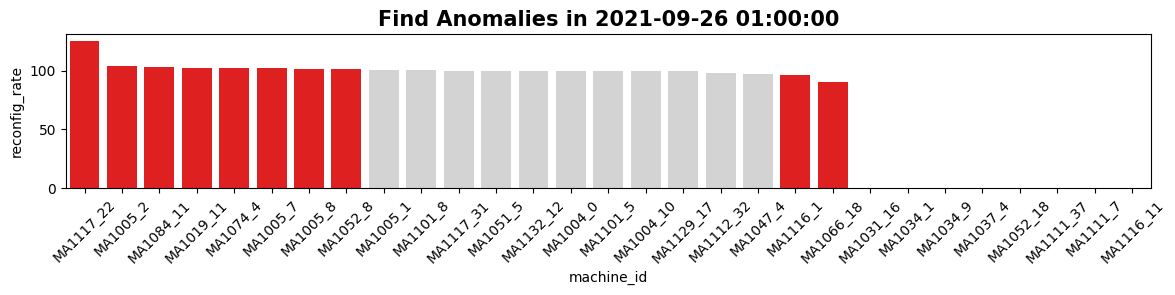

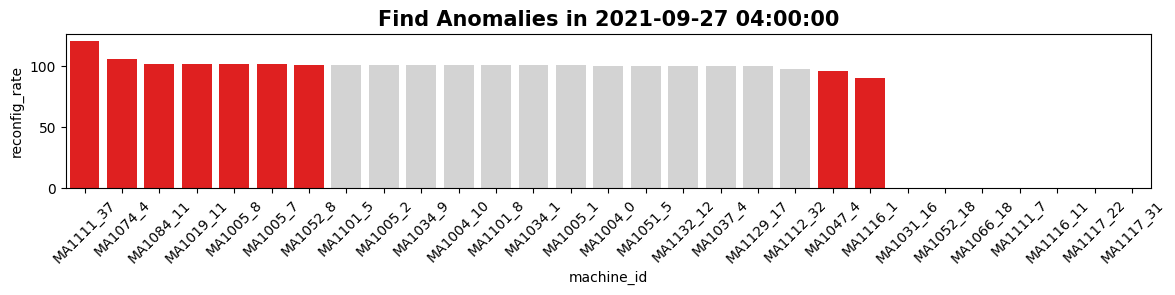

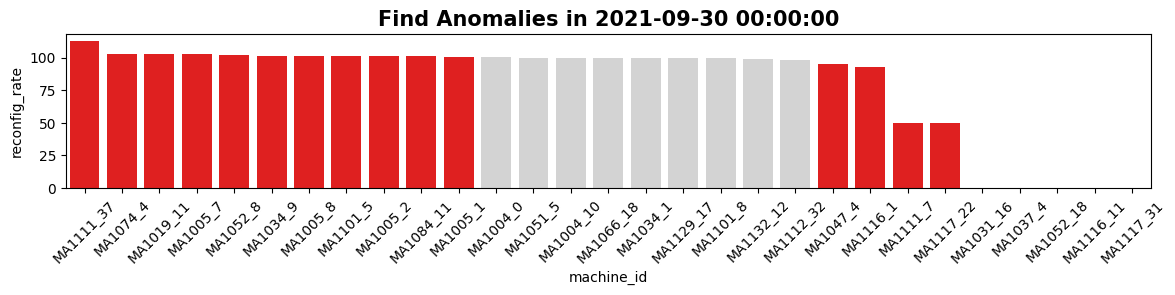

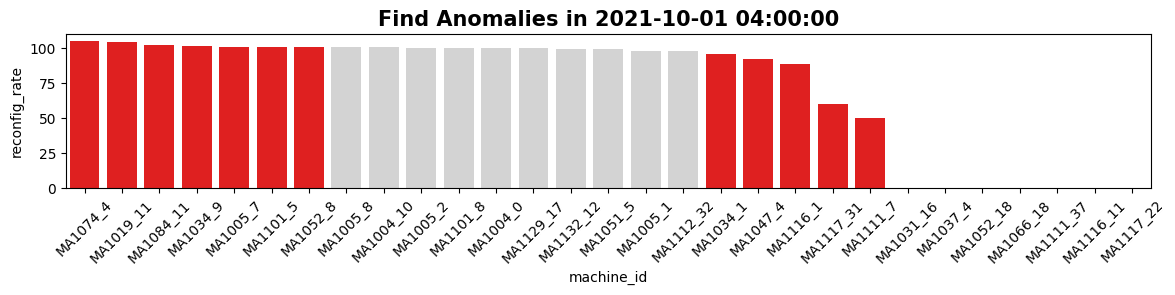

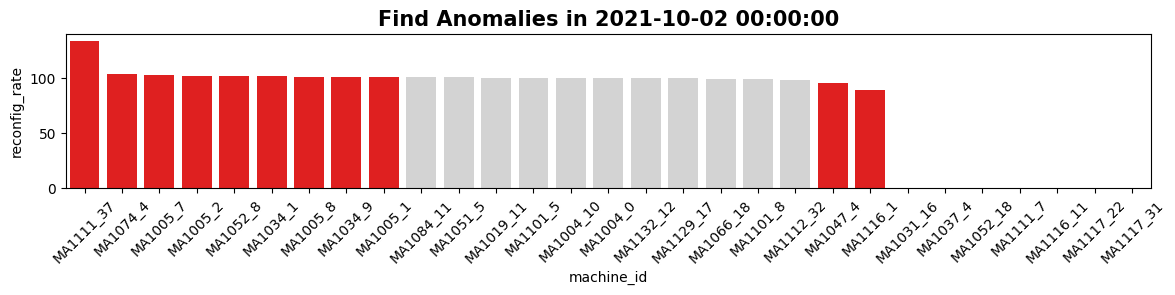

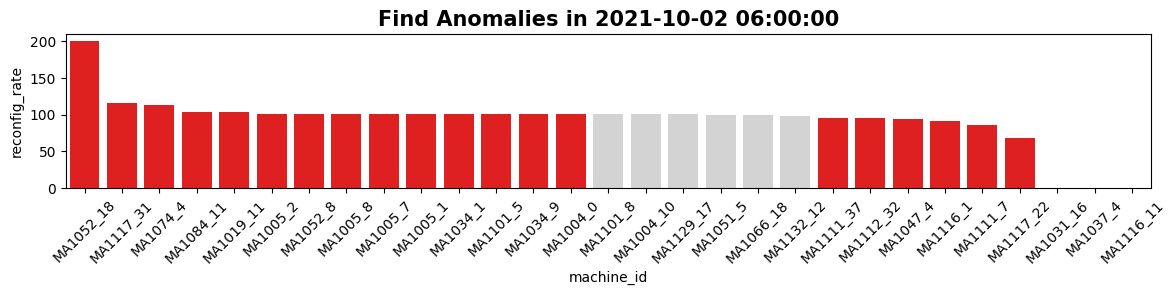

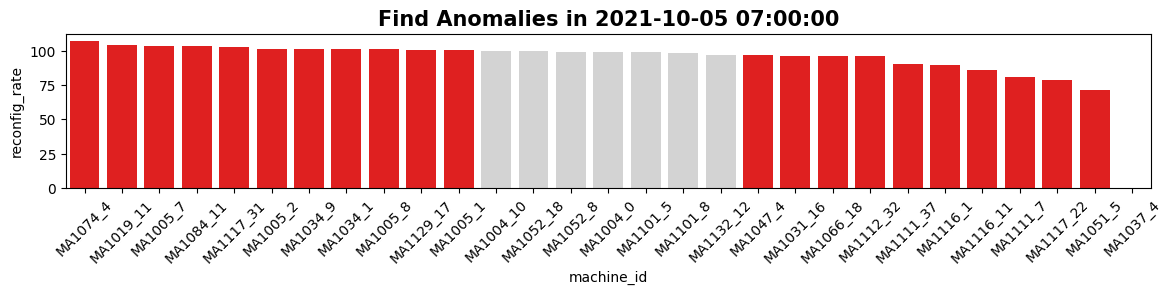

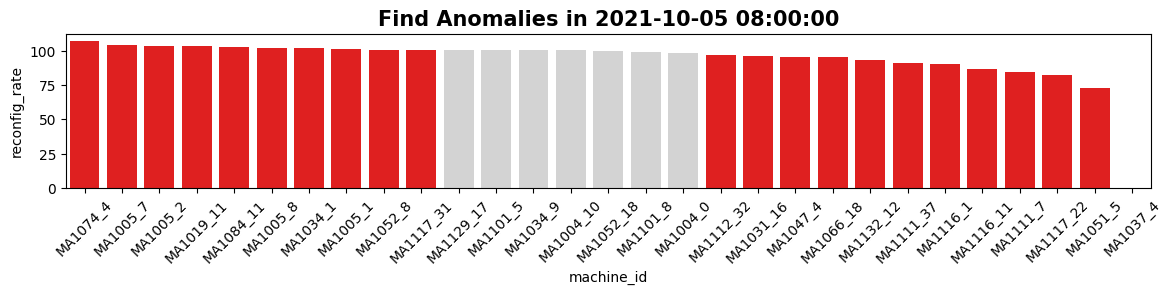

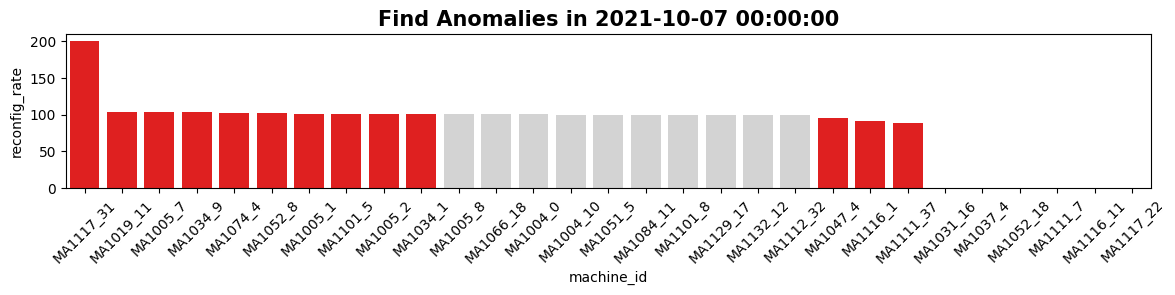

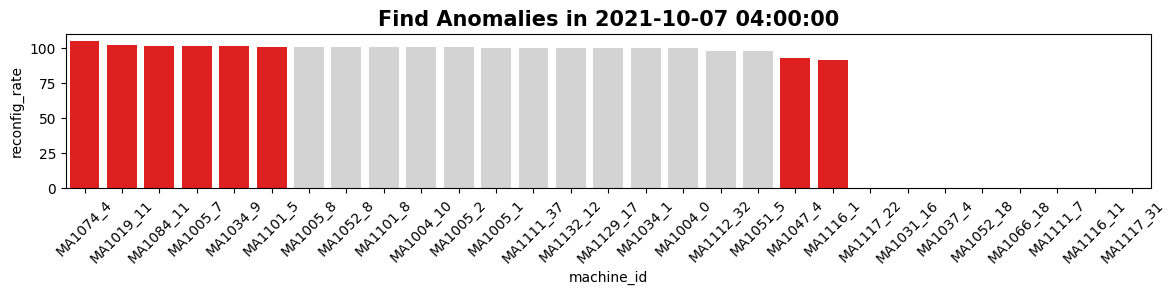

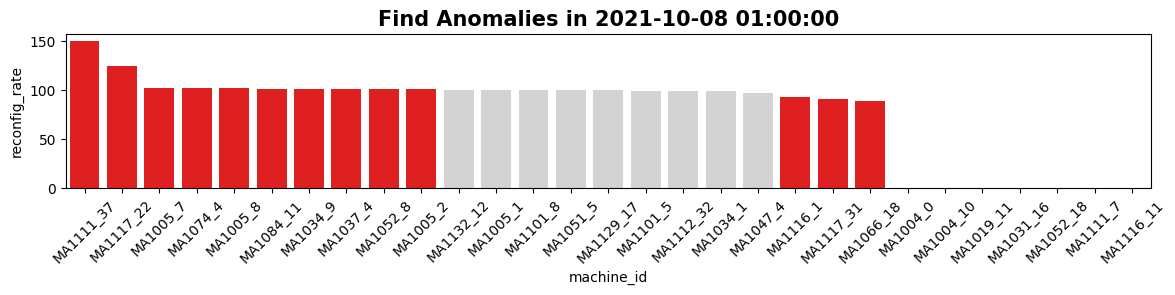

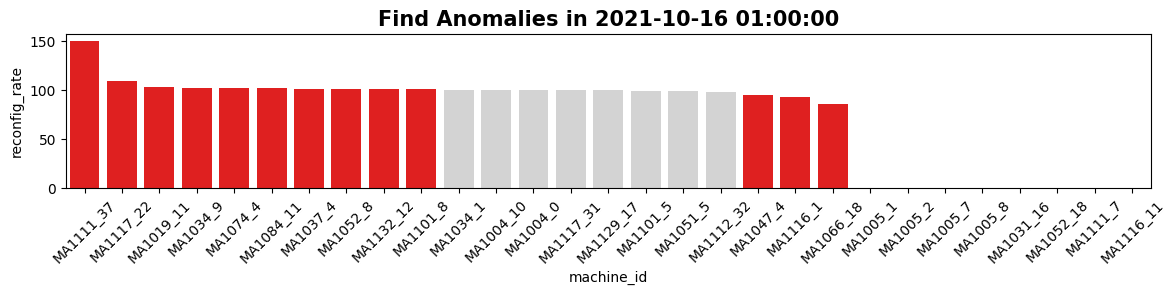

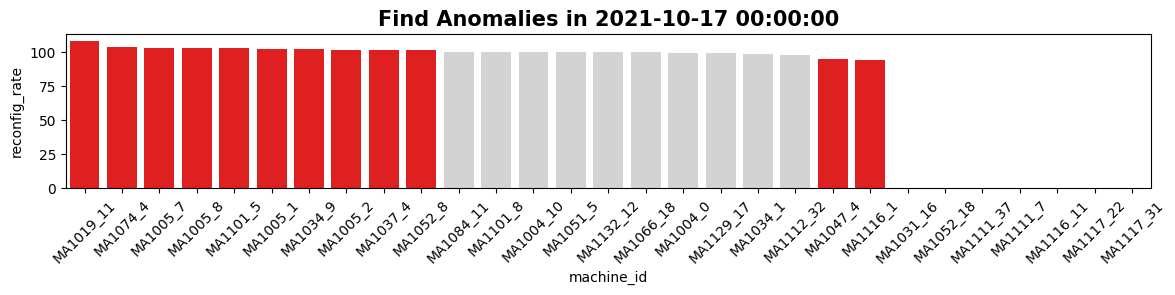

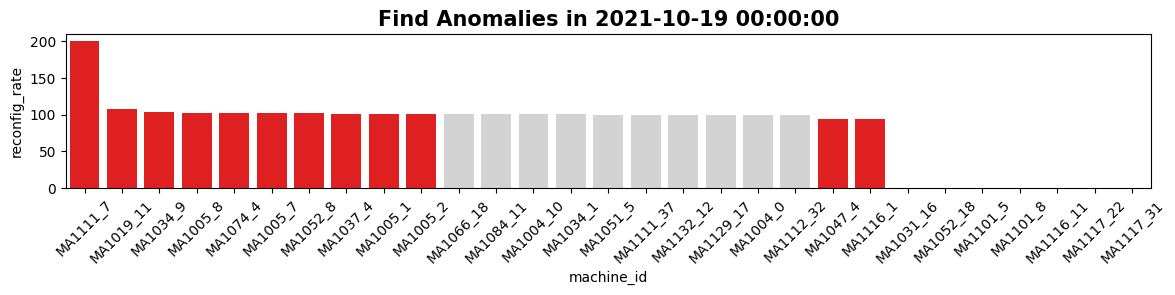

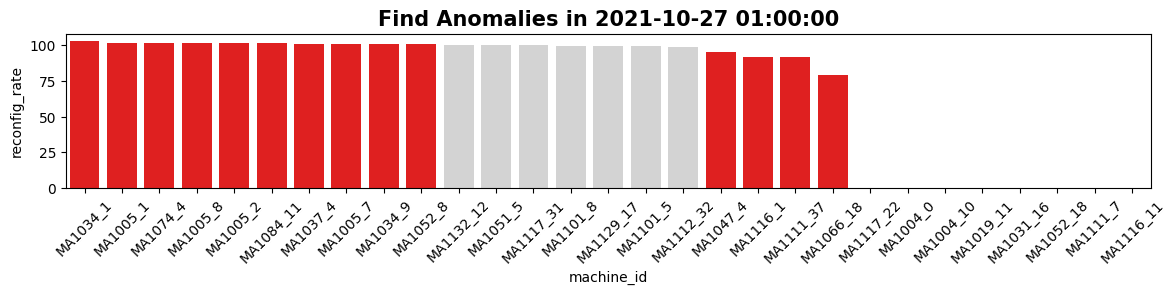

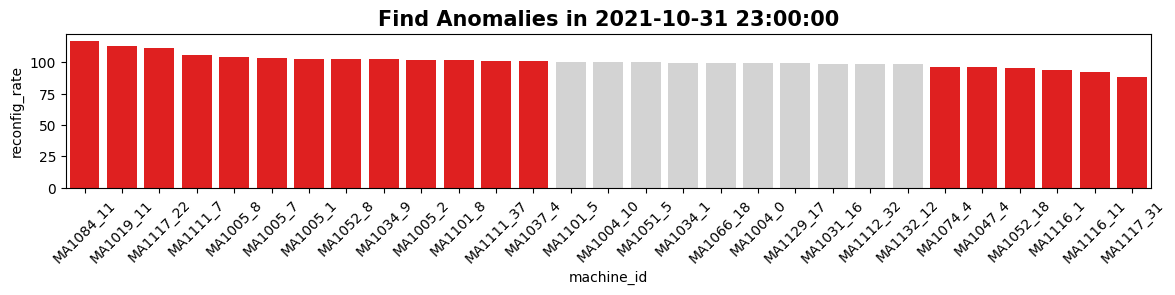

In [ ]:
for time in reconfig_anomalies.index:
    anomaly_machine = df[df.time == pd.Timestamp(time)][['machine_id', 'reconfig_rate']].sort_values(by='reconfig_rate', ascending=False).fillna(0)

    # color_list = ['red' if val >= anomaly_machine['reconfig_rate'].mean() + 2*anomaly_machine['reconfig_rate'].std() else 'lightgrey' for val in  anomaly_machine['reconfig_rate'] ]
    color_list = ['red' if (val > max_reconfig) or (val < min_reconfig) else 'lightgrey' for val in  anomaly_machine['reconfig_rate'] ]

    plt.figure(figsize = (14, 2))
    sns.barplot(data = anomaly_machine,
                x='machine_id',
                y='reconfig_rate',
                order = anomaly_machine['machine_id'].values,
                palette=color_list)
    plt.title(f'Find Anomalies in {time}', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

# 6.machine_id별 특징

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
machine_gp = df.groupby('machine_id')[['connect_avg', 'connect_max', 'in_handover_rate', 'out_handover_rate', 'inter_handover_rate', 'lower_prb', 'upper_prb', 'reconfig_rate']].agg(['mean', 'std']).reset_index()

In [ ]:
machine_gp.head()

machine_id connect_avg            connect_max            in_handover_rate  \
                    mean        std        mean        std             mean   
0   MA1004_0   24.063495   4.653041   39.341429   6.250707        97.713511   
1  MA1004_10   36.635651   7.878145   55.677857   9.917736        97.043857   
2   MA1005_1   17.534308   5.573715   29.684638   7.784626        97.705714   
3   MA1005_2   20.279460   8.800847   33.921713  13.670867        98.169345   
4   MA1005_7   33.386464  17.158242   50.844675  22.027259        98.990901   

            out_handover_rate           inter_handover_rate            \
        std              mean       std                mean       std   
0  1.187584         99.859474  0.346720           99.806609  0.361513   
1  4.051652         99.781237  0.437942           99.833927  0.278208   
2  2.209514         99.800264  0.442415           99.788735  0.463571   
3  2.495652         99.654801  1.465718           99.681957  0.884616   
4  1.842042         99.813274  0.396561           99.688227  1.053860   

   lower_prb             upper_prb            reconfig_rate            
        mean        std       mean        std          mean       std  
0  33.966996  13.196508  26.694314  12.202129     98.795498  0.953976  
1  53.890751  20.035440  49.564771  19.168140    100.299157  0.532294  
2  26.827029  10.542681  22.183528  12.237794    100.991693  0.711158  
3  28.623592  13.240977  27.437531  15.494438    101.901421  1.224240  
4  38.199965  19.120730  38.635444  22.880921    103.202274  1.300867

In [ ]:
machine_gp.columns = [f+'_'+b for f, b in machine_gp.columns]

In [ ]:
kmeans = KMeans(n_clusters=28)

In [ ]:
kmeans.fit(machine_gp.iloc[:,1:])

KMeans(n_clusters=28)

In [ ]:
cluster_list = 15
total_inertia = []
silhouette_vals = []

for num in range(1,cluster_list+1):
    kmeans = KMeans(n_clusters=num)
    predict = kmeans.fit_predict(machine_gp.iloc[:,1:])
    total_inertia.append(kmeans.inertia_)
    # silhouette_vals.append(silhouette_score(machine_gp.iloc[:,1:], predict))
    # print(silhouette_score(machine_gp.iloc[:,1:], predict))

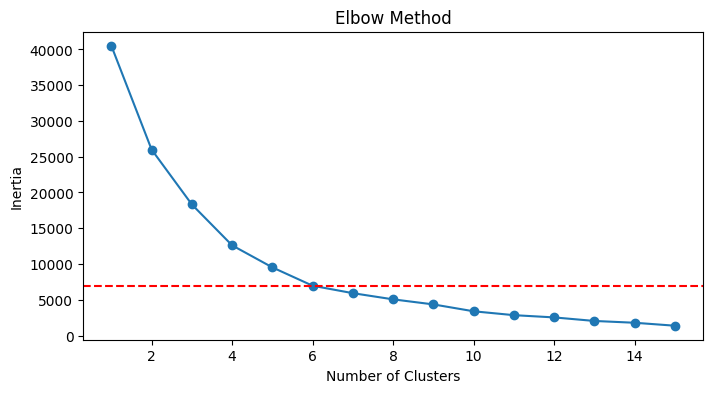

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(1, cluster_list+1), total_inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axhline(total_inertia[5], linestyle='--', color='red')
plt.show()

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

# 해당 함수는 테스트할 visualize_silhouette(테스팅할 군집 개수 리스트, 학습시킬 데이터) 로 사용 가능
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10

        # 그래프의 제목 및 범례 설정
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

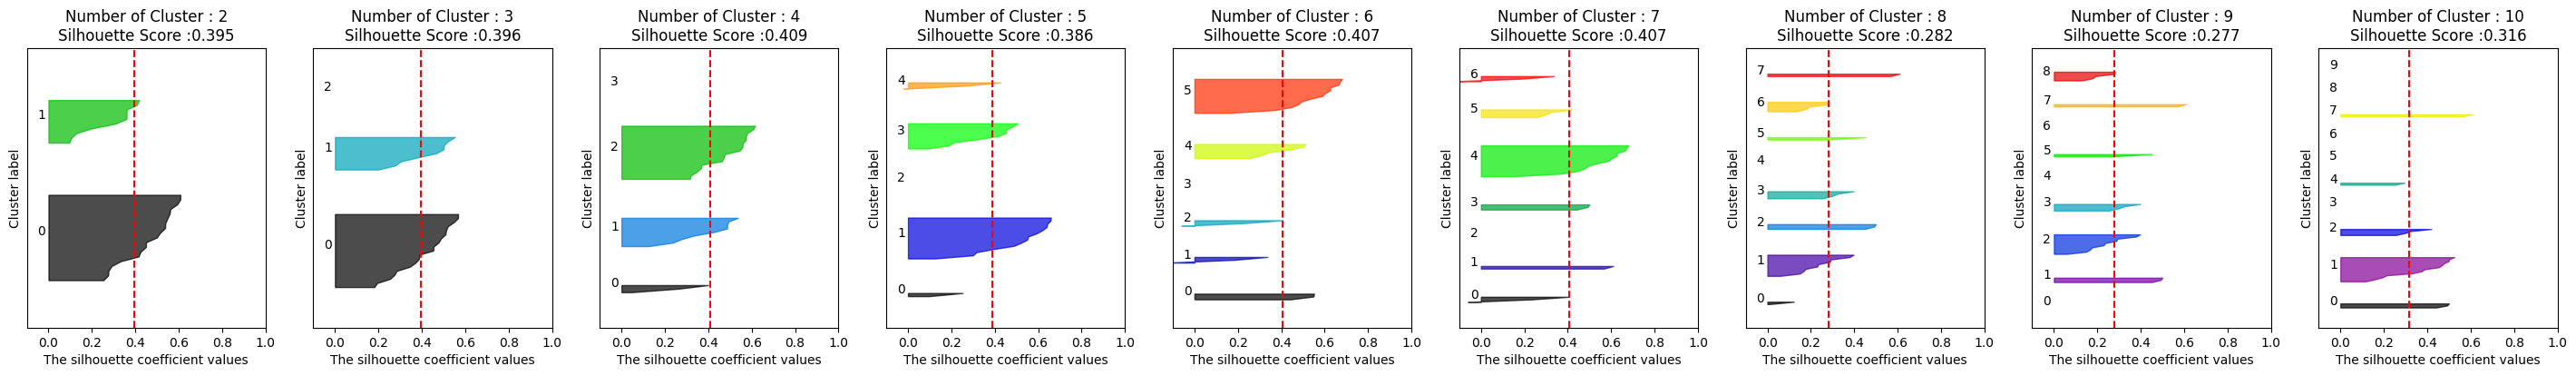

In [ ]:
visualize_silhouette([2,3,4,5,6,7,8,9,10], machine_gp.iloc[:,1:])

In [ ]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(machine_gp.iloc[:,1:])
machine_gp['cluster'] = predict

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(machine_gp.iloc[:,1:])
machine_gp['x_pca'] = pca_result[:,0]
machine_gp['y_pca'] = pca_result[:,1]

In [ ]:
machine_gp.head()

,machine_id_,connect_avg_mean,connect_avg_std,connect_max_mean,connect_max_std,in_handover_rate_mean,in_handover_rate_std,out_handover_rate_mean,out_handover_rate_std,inter_handover_rate_mean,inter_handover_rate_std,lower_prb_mean,lower_prb_std,upper_prb_mean,upper_prb_std,reconfig_rate_mean,reconfig_rate_std,cluster,x_pca,y_pca
0,MA1004_0,24.063495,4.653041,39.341429,6.250707,97.713511,1.187584,99.859474,0.346720,99.806609,0.361513,33.966996,13.196508,26.694314,12.202129,98.795498,0.953976,0,-3.868306,22.042724
1,MA1004_10,36.635651,7.878145,55.677857,9.917736,97.043857,4.051652,99.781237,0.437942,99.833927,0.278208,53.890751,20.035440,49.564771,19.168140,100.299157,0.532294,5,22.969457,45.858647
2,MA1005_1,17.534308,5.573715,29.684638,7.784626,97.705714,2.209514,99.800264,0.442415,99.788735,0.463571,26.827029,10.542681,22.183528,12.237794,100.991693,0.711158,0,-14.344784,14.759565
3,MA1005_2,20.279460,8.800847,33.921713,13.670867,98.169345,2.495652,99.654801,1.465718,99.681957,0.884616,28.623592,13.240977,27.437531,15.494438,101.901421,1.224240,0,-5.217706,16.717264
4,MA1005_7,33.386464,17.158242,50.844675,22.027259,98.990901,1.842042,99.813274,0.396561,99.688227,1.053860,38.199965,19.120730,38.635444,22.880921,103.202274,1.300867,5,22.314222,27.084456


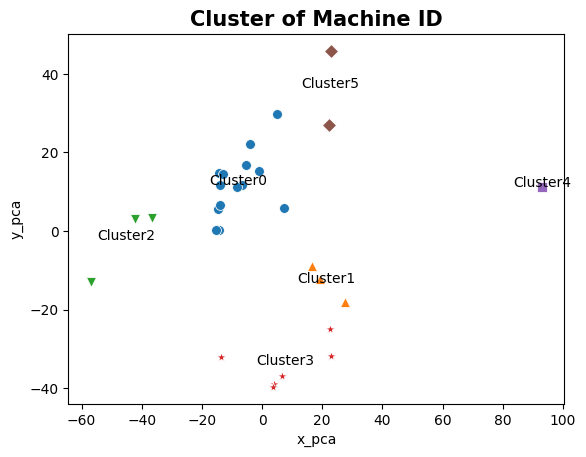

In [ ]:
marker_list = ['o','^', 'v', '*', 's', 'D']
for idx, marker in enumerate(marker_list):
    cluster_df = machine_gp[machine_gp['cluster']==idx]
    sns.scatterplot(data=cluster_df,
                    x='x_pca',
                    y='y_pca',
                    marker = marker,
                    s= 50)
    plt.text(cluster_df.x_pca.mean(), cluster_df.y_pca.mean(), f'Cluster{idx}', ha='center')
plt.title('Cluster of Machine ID', fontsize=15, fontweight='semibold')
plt.show()

In [ ]:
for i in range(6):
    machine_list = machine_gp[machine_gp['cluster']==i]['machine_id_'].values
    print('{}th cluster : {}'.format(i, machine_list))

0th cluster : ['MA1004_0' 'MA1005_1' 'MA1005_2' 'MA1005_8' 'MA1034_1' 'MA1034_9'
 'MA1037_4' 'MA1047_4' 'MA1052_8' 'MA1074_4' 'MA1101_5' 'MA1101_8'
 'MA1116_1' 'MA1129_17']
1th cluster : ['MA1031_16' 'MA1112_32' 'MA1116_11']
2th cluster : ['MA1019_11' 'MA1051_5' 'MA1084_11']
3th cluster : ['MA1066_18' 'MA1111_37' 'MA1111_7' 'MA1117_22' 'MA1117_31' 'MA1132_12']
4th cluster : ['MA1052_18']
5th cluster : ['MA1004_10' 'MA1005_7']


In [ ]:
machine_gp.groupby('cluster').mean().T.style.background_gradient()

cluster,0,1,2,3,4,5
connect_avg_mean,19.412077,30.109738,3.724806,7.212265,64.162421,35.011058
connect_avg_std,8.014678,27.079563,1.706884,4.815688,46.949967,12.518193
connect_max_mean,33.663686,49.627449,9.046284,55.161049,92.163587,53.261266
connect_max_std,11.830690,38.498958,2.919078,43.943886,61.195823,15.972497
in_handover_rate_mean,98.282073,99.031894,87.932193,98.654374,96.333711,98.017379
in_handover_rate_std,2.685748,4.449619,12.931633,2.382664,14.539520,2.946847
out_handover_rate_mean,99.784235,99.936073,99.748983,99.562698,99.944021,99.797256
out_handover_rate_std,0.571795,0.285798,1.312697,0.493835,0.140605,0.417251
inter_handover_rate_mean,99.735730,99.875462,97.397816,99.898312,99.857816,99.761077
inter_handover_rate_std,1.215363,0.516635,11.810134,0.442037,0.444699,0.666034
